In [1]:
import sys
sys.path.append('C:\\projects\\UTNCE\\src\\utnce202402')

In [2]:
from simplify import *
from prepare import *
from routing import *
from percolation_plot import *
from generate import *
from transfer import *
from copy import deepcopy
from shapely.geometry import Point,LineString
from pyproj import Proj, Transformer
import pickle
import itertools
import random
from sympy import symbols, Eq, solve

In [3]:
osm_path = "C:\\projects\\UTNCE\\data\\Amsterdam.large.pbf"

# Subway-Amsterdam 

## Generate Baseline network

In [4]:
# Obtain sub-stations in the city
city_sub_stations = sub_stations(osm_path)

In [5]:
# Obtain subway network data
city_sub_network = subway_network(osm_path)

# Prepare the network edges and nodes based on sub-stations and subway network
edges, nodes = prepare_network(city_sub_network, city_sub_stations)

# Expand the edges if required
edges = expand_edges(edges)

# Obtain sub-routes in the city
city_sub_routes = sub_routes(osm_path)

# Sort the sub-routes
city_sub_routes = sorted_routes(city_sub_routes)

# Check the name and assign a column
check_name = check_to_column(city_sub_routes, city_sub_stations)

topology: 100%|████████████████████████████████████████████████████████████████████| 962/962 [00:00<00:00, 9110.33it/s]


In [6]:
id_nodes_length_sub = len(nodes)
id_edges_length_sub = len(edges)

In [7]:
id_nodes_length_sub

868

In [8]:
id_edges_length_sub

962

In [9]:
city_sub_edges = pd.DataFrame(edges.copy())
city_sub_nodes = pd.DataFrame(nodes.copy())

In [10]:
# delete 3 pairs useless and wrong edges 
city_sub_edges.drop(city_sub_edges[(city_sub_edges['from_id'] == 771) & (city_sub_edges['to_id'] == 761)].index, inplace=True)
city_sub_edges.drop(city_sub_edges[(city_sub_edges['from_id'] == 771) & (city_sub_edges['to_id'] == 766)].index, inplace=True)
city_sub_edges.drop(city_sub_edges[(city_sub_edges['from_id'] == 762) & (city_sub_edges['to_id'] == 771)].index, inplace=True)
city_sub_edges.drop(city_sub_edges[(city_sub_edges['from_id'] == 767) & (city_sub_edges['to_id'] == 771)].index, inplace=True)

city_sub_edges.drop(city_sub_edges[(city_sub_edges['from_id'] == 780) & (city_sub_edges['to_id'] == 773)].index, inplace=True)
city_sub_edges.drop(city_sub_edges[(city_sub_edges['from_id'] == 780) & (city_sub_edges['to_id'] == 772)].index, inplace=True)
city_sub_edges.drop(city_sub_edges[(city_sub_edges['from_id'] == 774) & (city_sub_edges['to_id'] == 780)].index, inplace=True)
city_sub_edges.drop(city_sub_edges[(city_sub_edges['from_id'] == 775) & (city_sub_edges['to_id'] == 780)].index, inplace=True)

city_sub_edges.drop(city_sub_edges[(city_sub_edges['from_id'] == 180) & (city_sub_edges['to_id'] == 345)].index, inplace=True)

city_sub_edges.drop(city_sub_edges[(city_sub_edges['from_id'] == 491) & (city_sub_edges['to_id'] == 492)].index, inplace=True)
city_sub_edges.drop(city_sub_edges[(city_sub_edges['from_id'] == 498) & (city_sub_edges['to_id'] == 499)].index, inplace=True)



city_sub_edges.drop(city_sub_edges[(city_sub_edges['from_id'] == 634) & (city_sub_edges['to_id'] == 635)].index, inplace=True)
city_sub_edges.drop(city_sub_edges[(city_sub_edges['from_id'] == 654) & (city_sub_edges['to_id'] == 655)].index, inplace=True)
city_sub_edges.drop(city_sub_edges[(city_sub_edges['from_id'] == 584) & (city_sub_edges['to_id'] == 585)].index, inplace=True)
city_sub_edges.drop(city_sub_edges[(city_sub_edges['from_id'] == 569) & (city_sub_edges['to_id'] == 570)].index, inplace=True)
city_sub_edges.drop(city_sub_edges[(city_sub_edges['from_id'] == 588) & (city_sub_edges['to_id'] == 589)].index, inplace=True)
city_sub_edges.drop(city_sub_edges[(city_sub_edges['from_id'] == 577) & (city_sub_edges['to_id'] == 589)].index, inplace=True)
city_sub_edges.drop(city_sub_edges[(city_sub_edges['from_id'] == 607) & (city_sub_edges['to_id'] == 577)].index, inplace=True)
city_sub_edges.drop(city_sub_edges[(city_sub_edges['from_id'] == 564) & (city_sub_edges['to_id'] == 565)].index, inplace=True)
city_sub_edges.drop(city_sub_edges[(city_sub_edges['from_id'] == 586) & (city_sub_edges['to_id'] == 587)].index, inplace=True)

city_sub_edges.drop(city_sub_edges[(city_sub_edges['from_id'] == 643) & (city_sub_edges['to_id'] == 644)].index, inplace=True)
city_sub_edges.drop(city_sub_edges[(city_sub_edges['from_id'] == 638) & (city_sub_edges['to_id'] == 639)].index, inplace=True)

city_sub_edges = city_sub_edges.reset_index(drop = True)

In [11]:
# revise Zuid metro stations' coordinates, replace 712 with 180 and 345 nodes to avoid wrong shortest-path edges
geometry_value1 = city_sub_nodes.loc[city_sub_nodes['id'] == 180, 'geometry'].values[0]
geometry_value2 = city_sub_nodes.loc[city_sub_nodes['id'] == 345, 'geometry'].values[0]

city_sub_stations.loc[city_sub_stations['osm_id'] == '4073737797', 'geometry'] = geometry_value1
city_sub_stations.loc[city_sub_stations['osm_id'] == '4073737797', 'geo_x'] = geometry_value1.x
city_sub_stations.loc[city_sub_stations['osm_id'] == '4073737797', 'geo_y'] = geometry_value1.y

city_sub_stations.loc[city_sub_stations['osm_id'] == '4073737796', 'geometry'] = geometry_value2
city_sub_stations.loc[city_sub_stations['osm_id'] == '4073737796', 'geo_x'] = geometry_value2.x
city_sub_stations.loc[city_sub_stations['osm_id'] == '4073737796', 'geo_y'] = geometry_value2.y

In [12]:
city_sub_nodes

,geometry,degree,id
0,POINT (4.9236699 52.3361909),2,0
1,POINT (4.9232197 52.3339159),2,1
2,POINT (4.9642294 52.2945339),2,2
3,POINT (4.9673168 52.2943931),2,3
4,POINT (4.9622901 52.2955678),2,4
...,...,...,...
863,POINT (4.8906476 52.3539585),2,863
864,POINT (4.8906487 52.3539577),2,864
865,POINT (4.8927726 52.3704434),2,865
866,POINT (4.9010846 52.371353),2,866


In [13]:
city_sub_stations

,osm_id,public_transport,railway,tram,subway,highway,bus,name,geometry,geo_x,geo_y
129,240489038,stop_position,stop,None,yes,None,None,Wibautstraat,POINT (4.91205 52.35459),4.912049,52.354595
134,250222259,stop_position,stop,None,yes,None,None,Zuid,POINT (4.87398 52.33904),4.873978,52.339035
136,250222332,stop_position,stop,None,yes,None,None,Station Sloterdijk,POINT (4.83898 52.38904),4.838979,52.389038
137,250222348,stop_position,stop,None,yes,None,None,Isolatorweg,POINT (4.85060 52.39510),4.850596,52.395103
138,250224115,stop_position,stop,None,yes,None,None,De Vlugtlaan,POINT (4.83806 52.37946),4.838056,52.379461
...,...,...,...,...,...,...,...,...,...,...,...
3469,7106870068,stop_position,stop,None,yes,None,None,Waterlooplein,POINT (4.90361 52.36664),4.903606,52.366636
3470,7106870071,stop_position,stop,None,yes,None,None,Waterlooplein,POINT (4.90375 52.36669),4.903753,52.366690
3471,7106870124,stop_position,stop,None,yes,None,None,Nieuwmarkt,POINT (4.90094 52.37142),4.900938,52.371424
3472,7106910981,stop_position,stop,None,yes,None,None,Weesperplein,POINT (4.90792 52.36133),4.907918,52.361326


In [14]:
city_sub_edges

,osm_id,geometry,railway,service,id,from_id,to_id,distance,time,weights,to_from,from_to
0,23157994,"LINESTRING (4.9236699 52.3361909, 4.9236979 52...",subway,None,0,0,1,258.660599,0.010346,258,"(0, 1)","(1, 0)"
1,23158053,"LINESTRING (4.9642294 52.2945339, 4.9644259 52...",subway,None,1,2,3,215.433271,0.008617,215,"(2, 3)","(3, 2)"
2,23158054,"LINESTRING (4.9622901 52.2955678, 4.9624673 52...",subway,None,2,4,5,121.794737,0.004872,121,"(4, 5)","(5, 4)"
3,23189033,"LINESTRING (4.8467318 52.3952137, 4.8471439 52...",subway,None,3,6,7,28.046592,0.001122,28,"(6, 7)","(7, 6)"
4,23189039,"LINESTRING (4.8409161 52.3937679, 4.8416087 52...",subway,None,4,8,492,382.935219,0.015317,382,"(8, 492)","(492, 8)"
...,...,...,...,...,...,...,...,...,...,...,...,...
935,1131538381,"LINESTRING (4.9200955 52.3417374, 4.9200444 52...",subway,None,957,803,463,73.656989,0.002946,73,"(803, 463)","(463, 803)"
936,1131538382,"LINESTRING (4.9201445 52.3416568, 4.9200955 52...",subway,None,958,462,803,9.568427,0.000383,9,"(462, 803)","(803, 462)"
937,1131538383,"LINESTRING (4.9200365 52.3417239, 4.9200773 52...",subway,None,959,804,246,9.568874,0.000383,9,"(804, 246)","(246, 804)"
938,1131538384,"LINESTRING (4.9197172 52.3423576, 4.9197589 52...",subway,None,960,463,804,73.789113,0.002952,73,"(463, 804)","(804, 463)"


In [15]:
city_sub_routes

,osm_id,route,to,name,ref,network,service,geometry
0,18683,subway,Isolatorweg,Metro 50: Gein => Isolatorweg,50,Stadsvervoer Amsterdam,None,"MULTILINESTRING ((4.98996 52.29640, 4.98959 52..."
1,4515354,subway,Gein,Metro 50: Isolatorweg => Gein,50,Stadsvervoer Amsterdam,None,"MULTILINESTRING ((4.83880 52.38842, 4.83897 52..."
2,31249,subway,Isolatorweg,Metro 51: Centraal Station => Isolatorweg,51,Stadsvervoer Amsterdam,None,"MULTILINESTRING ((4.90193 52.37689, 4.90202 52..."
3,4515355,subway,Centraal Station,Metro 51: Isolatorweg => Centraal Station,51,Stadsvervoer Amsterdam,None,"MULTILINESTRING ((4.83880 52.38842, 4.83897 52..."
4,8466667,subway,Zuid,Metro 52: Noord => Zuid,52,Stadsvervoer Amsterdam,None,"MULTILINESTRING ((4.93265 52.40228, 4.93269 52..."
5,8466671,subway,Noord,Metro 52: Zuid => Noord,52,Stadsvervoer Amsterdam,None,"MULTILINESTRING ((4.87423 52.33922, 4.87552 52..."
6,18532,subway,Gaasperplas,Metro 53: Centraal Station => Gaasperplas,53,Stadsvervoer Amsterdam,None,"MULTILINESTRING ((4.90193 52.37689, 4.90202 52..."
7,4515356,subway,Amsterdam Centraal,Metro 53: Gaasperplas => Centraal Station,53,Stadsvervoer Amsterdam,None,"MULTILINESTRING ((4.98373 52.31201, 4.98364 52..."
8,18423,subway,Gein,Metro 54: Centraal Station => Gein,54,Stadsvervoer Amsterdam,None,"MULTILINESTRING ((4.90193 52.37689, 4.90202 52..."
9,4515357,subway,Centraal Station,Metro 54: Gein => Centraal Station,54,Stadsvervoer Amsterdam,None,"MULTILINESTRING ((4.98996 52.29640, 4.98959 52..."


In [16]:
replacement_dict = {
     'Amsterdam Centraal': 'Centraal Station',
}

In [17]:
# Replace values in the 'to' column of the metro routes using the replacement dictionary
city_sub_routes['to'] = city_sub_routes['to'].replace(replacement_dict, regex=True).str.strip()

# Reset the index of the metro routes
city_sub_routes = city_sub_routes.reset_index(drop=True)

# Check if the values in the 'to' column of the metro routes match the station names
check_name = check_to_column(city_sub_routes, city_sub_stations)

In [18]:
# # 将DataFrame保存为pickle文件
# city_sub_edges.to_pickle('city_sub_edges_0328.pkl')
# city_sub_stations.to_pickle('city_sub_stations_0328.pkl')
# city_sub_nodes.to_pickle('city_sub_nodes_0328.pkl')
# city_sub_routes.to_pickle('city_sub_routes_0328.pkl')

In [19]:
# Create a dictionary mapping start stations to their corresponding routes
city_sub_start_station_name_dict = start_station_dict(city_sub_routes)

# Create a dictionary mapping subway lines to their corresponding routes
city_sub_line_dict = line_dict(city_sub_routes)

# Create a list of all station names in the city's subway network
city_all_sub_stations_name = all_station_list(city_sub_stations)

# Create a dictionary mapping subway lines to the ordered list of stations on each line
city_sub_order_route_dict = order_stations_inline(city_sub_line_dict, city_all_sub_stations_name, city_sub_routes, city_sub_start_station_name_dict)

In [20]:
# revise station sequence of 51_1 route
df51_1 = pd.read_excel('C:\\projects\\UTNCE\\data\\Metro 51 Centraal Station = Isolatorweg.xlsx',header=None)
df51_1 = df51_1[0::4].reset_index(drop=True)
df51_1.columns = ['name']
df51_1.name[9] = 'Zuid' 
df51_1.name[13] = 'Lelylaan' 
df51_1.name[16] = 'De Vlugtlaan' 

df = city_sub_order_route_dict['Metro 51: Centraal Station => Isolatorweg']
df_reordered = pd.merge(df51_1,df,on='name')

desired_order = ['id', 'name', 'geometry', 'geo_x', 'geo_y']
df_reordered = df_reordered[desired_order]

key_to_replace = 'Metro 51: Centraal Station => Isolatorweg'
city_sub_order_route_dict[key_to_replace] = df_reordered

# city_sub_order_route_dict

In [21]:
df52_metro_1 = city_sub_order_route_dict['Metro 52: Noord => Zuid']
df52_metro_2 = city_sub_order_route_dict['Metro 52: Zuid => Noord']

df52_metro_1_dep = df52_metro_1[df52_metro_1.name == 'De Pijp'].copy()
df52_metro_2_dep = df52_metro_2[df52_metro_2.name == 'De Pijp'].copy()


columns_to_swap = ['geometry', 'geo_x', 'geo_y']
for column in columns_to_swap:
    temp = df52_metro_1_dep[column].copy()
    df52_metro_1_dep.loc[df52_metro_1_dep['name'] == 'De Pijp', column] = df52_metro_2_dep.loc[df52_metro_2_dep['name'] == 'De Pijp', column].values
    df52_metro_2_dep.loc[df52_metro_2_dep['name'] == 'De Pijp', column] = temp.values

df52_metro_1.loc[df52_metro_1['name'] == 'De Pijp', columns_to_swap] = df52_metro_1_dep[columns_to_swap].values
df52_metro_2.loc[df52_metro_2['name'] == 'De Pijp', columns_to_swap] = df52_metro_2_dep[columns_to_swap].values

# city_sub_order_route_dict

In [22]:
# Create a dictionary mapping subway lines to the pairs of station IDs on each line
city_sub_order_id_pairs = id_pairs_inline(city_sub_line_dict, city_sub_order_route_dict, city_sub_nodes)

In [23]:
# Create a graph representing the subway network using the extracted edges and nodes
G = create_ground_graph(city_sub_edges, city_sub_nodes)

# Calculate the shortest path id pairs for each subway line

city_sub_all_shortest_paths_id_dict = city_sub_order_id_pairs.copy()


for line in city_sub_order_id_pairs.keys():
    # Calculate all shortest paths id for the current line using the subway network edges
    city_sub_all_shortest_paths_id_dict[line] = all_shortest_path_id_list(G, city_sub_order_id_pairs[line], city_sub_edges)

In [24]:
# city_sub_all_shortest_paths_id_dict

In [25]:
city_sub_ordered_edges = edges_revise_direction(city_sub_all_shortest_paths_id_dict,city_sub_edges)
# city_sub_ordered_edges

In [26]:
G = nx.DiGraph()

for _, row in city_sub_nodes.iterrows():
    node = row['id']  # Assuming 'id' is the node identifier
    geometry = row['geometry']
    x, y = geometry.x, geometry.y
    G.add_node(node, pos=(x, y))
    
# Extract the edges from the input DataFrame and create a list of tuples with time
od = city_sub_ordered_edges[['from_id', 'to_id', 'time', 'weights']]
edges_list = []
for i, row in od.iterrows():
    weight_dict = {"weight": row[2]*60}
    tuple_row = (row[0], row[1], weight_dict)
    edges_list.append(tuple_row)
# edges_list
G.add_edges_from(edges_list)

In [27]:
# Calculate the shortest path pairs for each subway line
city_sub_shortest_path_pairs_dict = city_sub_order_id_pairs.copy()
duplicate_row_count = city_sub_order_id_pairs.copy()
city_sub_shortest_path_edges_dict = city_sub_order_id_pairs.copy()
city_sub_edges_dict = city_sub_order_id_pairs.copy()

for line in city_sub_order_id_pairs.keys():
    # Calculate all shortest paths for the current line using the subway network edges
    city_sub_shortest_path_pairs_dict[line] = all_shortest_paths(G, city_sub_order_id_pairs[line], city_sub_ordered_edges)

    # Count the duplicate rows, calculate the weighted edges for shortest paths,
    # and update the subway network edges for the current line
    duplicate_row_count[line], city_sub_shortest_path_edges_dict[line], city_sub_edges_dict[line] = edges_with_count_weight(city_sub_shortest_path_pairs_dict[line], city_sub_ordered_edges)
    
# Plot all subway routes
# plot_routes(city_sub_routes, city_sub_ordered_edges, city_sub_shortest_path_edges_dict)

### Add columns to edges--city_sub_extended_edges

In [28]:
city_sub_shortest_path_edges = add_ref_to_orderroutes_or_shortestpath_dict(city_sub_shortest_path_edges_dict, city_sub_routes)

In [29]:
city_sub_extended_edges = add_columns_to_edges(city_sub_shortest_path_edges_dict,city_sub_ordered_edges)

In [30]:
# column_to_drop = 'count_weight'
# city_sub_extended_edges = city_sub_extended_edges.drop(columns=column_to_drop)

In [31]:
city_sub_extended_edges

,osm_id,geometry,railway,service,id,from_id,to_id,distance,time,weights,to_from,from_to,count_weight,route_name_list,route,ref
0,23157994,"LINESTRING (4.9236699 52.3361909, 4.9236979 52...",subway,None,0,1,0,258.660599,0.010346,258,"(0, 1)","(1, 0)",1.0,Metro 51: Isolatorweg => Centraal Station,subway,51
1,23158053,"LINESTRING (4.9642294 52.2945339, 4.9644259 52...",subway,None,1,2,3,215.433271,0.008617,215,"(3, 2)","(2, 3)",1.0,Metro 50: Isolatorweg => Gein,subway,"50, 54"
2,23158054,"LINESTRING (4.9622901 52.2955678, 4.9624673 52...",subway,None,2,4,5,121.794737,0.004872,121,"(5, 4)","(4, 5)",1.0,Metro 50: Isolatorweg => Gein,subway,"50, 54"
3,23189033,"LINESTRING (4.8467318 52.3952137, 4.8471439 52...",subway,None,3,7,6,28.046592,0.001122,28,"(6, 7)","(7, 6)",1.0,Metro 50: Isolatorweg => Gein,subway,"50, 51"
4,23189039,"LINESTRING (4.8409161 52.3937679, 4.8416087 52...",subway,None,4,492,8,382.935219,0.015317,382,"(8, 492)","(492, 8)",1.0,Metro 50: Isolatorweg => Gein,subway,"50, 51"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
935,1131538381,"LINESTRING (4.9200955 52.3417374, 4.9200444 52...",subway,None,957,803,463,73.656989,0.002946,73,"(463, 803)","(803, 463)",1.0,Metro 53: Gaasperplas => Centraal Station,subway,"53, 54"
936,1131538382,"LINESTRING (4.9201445 52.3416568, 4.9200955 52...",subway,None,958,462,803,9.568427,0.000383,9,"(803, 462)","(462, 803)",1.0,Metro 53: Gaasperplas => Centraal Station,subway,"53, 54"
937,1131538383,"LINESTRING (4.9200365 52.3417239, 4.9200773 52...",subway,None,959,246,804,9.568874,0.000383,9,"(804, 246)","(246, 804)",1.0,Metro 51: Isolatorweg => Centraal Station,subway,51
938,1131538384,"LINESTRING (4.9197172 52.3423576, 4.9197589 52...",subway,None,960,804,463,73.789113,0.002952,73,"(463, 804)","(804, 463)",1.0,Metro 51: Isolatorweg => Centraal Station,subway,51


### Organize edges dataframe for baseline network--city_sub_new_edges

In [32]:
city_sub_shortest_path_edges_df = pd.concat(city_sub_shortest_path_edges_dict.values()).reset_index(drop=True)
city_sub_shortest_path_edges_df.drop_duplicates(subset='geometry',inplace=True,ignore_index=True)
city_sub_shortest_path_edges_df

,from_id,to_id,osm_id,geometry,railway,service,id,distance,time,weights,from_to,to_from,count_weight,route_name_list,ref,route
0,634,317,166187911,"LINESTRING (4.9823107 52.2963387, 4.9838859 52...",subway,None,358,107.447350,0.004298,107,"(634, 317)","(317, 634)",1.0,Metro 50: Gein => Isolatorweg,50,subway
1,318,634,166187911,"LINESTRING (4.9838859 52.2963361, 4.9847396 52...",subway,None,359,58.234342,0.002329,58,"(318, 634)","(634, 318)",1.0,Metro 50: Gein => Isolatorweg,50,subway
2,321,318,166187913,"LINESTRING (4.9847396 52.2963405, 4.9850507 52...",subway,None,361,21.221392,0.000849,21,"(321, 318)","(318, 321)",1.0,Metro 50: Gein => Isolatorweg,50,subway
3,654,321,166187917,"LINESTRING (4.9850507 52.2963421, 4.9856334 52...",subway,None,366,140.268473,0.005611,140,"(654, 321)","(321, 654)",1.0,Metro 50: Gein => Isolatorweg,50,subway
4,328,654,166187917,"LINESTRING (4.9871059 52.2963808, 4.9873266 52...",subway,None,367,140.227871,0.005609,140,"(328, 654)","(654, 328)",1.0,Metro 50: Gein => Isolatorweg,50,subway
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
631,799,274,1061085953,"LINESTRING (4.9221322 52.3381876, 4.921962 52....",subway,None,951,26.073700,0.001043,26,"(799, 274)","(274, 799)",1.0,Metro 54: Centraal Station => Gein,54,subway
632,241,258,166133730,"LINESTRING (4.9292423 52.3310966, 4.9286644 52...",subway,None,285,79.981699,0.003199,79,"(241, 258)","(258, 241)",1.0,Metro 54: Gein => Centraal Station,54,subway
633,258,275,166134298,"LINESTRING (4.9286644 52.3317223, 4.927832 52....",subway,None,305,115.819483,0.004633,115,"(258, 275)","(275, 258)",1.0,Metro 54: Gein => Centraal Station,54,subway
634,275,696,503528039,"LINESTRING (4.927832 52.3326299, 4.926833 52.3...",subway,None,756,139.091384,0.005564,139,"(275, 696)","(696, 275)",1.0,Metro 54: Gein => Centraal Station,54,subway


In [33]:
city_sub_new_edges = pd.merge(city_sub_extended_edges,city_sub_shortest_path_edges_df.geometry,on='geometry',how='inner')
city_sub_new_edges

,osm_id,geometry,railway,service,id,from_id,to_id,distance,time,weights,to_from,from_to,count_weight,route_name_list,route,ref
0,23157994,"LINESTRING (4.9236699 52.3361909, 4.9236979 52...",subway,None,0,1,0,258.660599,0.010346,258,"(0, 1)","(1, 0)",1.0,Metro 51: Isolatorweg => Centraal Station,subway,51
1,23158053,"LINESTRING (4.9642294 52.2945339, 4.9644259 52...",subway,None,1,2,3,215.433271,0.008617,215,"(3, 2)","(2, 3)",1.0,Metro 50: Isolatorweg => Gein,subway,"50, 54"
2,23158054,"LINESTRING (4.9622901 52.2955678, 4.9624673 52...",subway,None,2,4,5,121.794737,0.004872,121,"(5, 4)","(4, 5)",1.0,Metro 50: Isolatorweg => Gein,subway,"50, 54"
3,23189033,"LINESTRING (4.8467318 52.3952137, 4.8471439 52...",subway,None,3,7,6,28.046592,0.001122,28,"(6, 7)","(7, 6)",1.0,Metro 50: Isolatorweg => Gein,subway,"50, 51"
4,23189039,"LINESTRING (4.8409161 52.3937679, 4.8416087 52...",subway,None,4,492,8,382.935219,0.015317,382,"(8, 492)","(492, 8)",1.0,Metro 50: Isolatorweg => Gein,subway,"50, 51"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
631,1131538381,"LINESTRING (4.9200955 52.3417374, 4.9200444 52...",subway,None,957,803,463,73.656989,0.002946,73,"(463, 803)","(803, 463)",1.0,Metro 53: Gaasperplas => Centraal Station,subway,"53, 54"
632,1131538382,"LINESTRING (4.9201445 52.3416568, 4.9200955 52...",subway,None,958,462,803,9.568427,0.000383,9,"(803, 462)","(462, 803)",1.0,Metro 53: Gaasperplas => Centraal Station,subway,"53, 54"
633,1131538383,"LINESTRING (4.9200365 52.3417239, 4.9200773 52...",subway,None,959,246,804,9.568874,0.000383,9,"(804, 246)","(246, 804)",1.0,Metro 51: Isolatorweg => Centraal Station,subway,51
634,1131538384,"LINESTRING (4.9197172 52.3423576, 4.9197589 52...",subway,None,960,804,463,73.789113,0.002952,73,"(463, 804)","(804, 463)",1.0,Metro 51: Isolatorweg => Centraal Station,subway,51


### Organize nodes dataframe for baseline network--city_sub_new_nodes

In [34]:
city_sub_shortest_path_nodes_id = pd.DataFrame(list(city_sub_new_edges['from_id'])+list(city_sub_new_edges['to_id'])).drop_duplicates(ignore_index = True)

In [35]:
city_sub_shortest_path_nodes_id = city_sub_shortest_path_nodes_id.rename(columns={0:'id'})

In [36]:
# city_sub_shortest_path_nodes_id

In [37]:
city_sub_new_nodes = pd.merge(city_sub_shortest_path_nodes_id,city_sub_nodes,on='id',how='left').reset_index(drop=True)
# city_sub_new_nodes

### Add columns to stations--city_sub_new_staions

In [38]:
city_sub_order_route_dict = add_ref_to_orderroutes_or_shortestpath_dict(city_sub_order_route_dict, city_sub_routes)

In [39]:
city_sub_new_stations = add_columns_to_nodes(city_sub_order_route_dict, city_sub_new_nodes)

In [40]:
city_sub_new_stations

,id,geometry,degree,name,geo_x,geo_y,coordinate_value,route_name_list,route,ref,transfer
0,328,POINT (4.98916 52.29641),2,Gein,4.989161,52.296407,"(4.9891612, 52.2964067)",Metro 50: Gein => Isolatorweg,subway,"50, 54","50, 54"
1,855,POINT (4.97400 52.29564),2,Reigersbos,4.974000,52.295637,"(4.9740002, 52.2956365)",Metro 50: Gein => Isolatorweg,subway,"50, 54","50, 54"
2,854,POINT (4.96013 52.29813),2,Holendrecht,4.960126,52.298132,"(4.9601264, 52.2981319)",Metro 50: Gein => Isolatorweg,subway,"50, 54","50, 54"
3,810,POINT (4.95213 52.30687),2,Bullewijk,4.952129,52.306869,"(4.9521292, 52.306869)",Metro 50: Gein => Isolatorweg,subway,"50, 54","50, 54"
4,809,POINT (4.94762 52.31181),2,Bijlmer ArenA,4.947618,52.311806,"(4.9476178, 52.311806)",Metro 50: Gein => Isolatorweg,subway,"50, 54","50, 54"
...,...,...,...,...,...,...,...,...,...,...,...
82,824,POINT (4.96734 52.32837),2,Verrijn Stuartweg,4.967335,52.328367,"(4.9673352, 52.3283668)",Metro 53: Gaasperplas => Centraal Station,subway,53,None
83,823,POINT (4.95669 52.33041),2,Station Diemen Zuid,4.956688,52.330406,"(4.9566878, 52.3304057)",Metro 53: Gaasperplas => Centraal Station,subway,53,None
84,829,POINT (4.94628 52.32683),2,Venserpolder,4.946277,52.326833,"(4.9462773, 52.3268326)",Metro 53: Gaasperplas => Centraal Station,subway,53,None
85,827,POINT (4.93028 52.32974),2,Van der Madeweg,4.930285,52.329735,"(4.9302846, 52.3297352)",Metro 53: Gaasperplas => Centraal Station,subway,"50, 53, 54","50, 53, 54"


## Create virtual edges at connection stations on single network 

#### Select nodes where need to build virtual edges based on name

In [41]:
connect_stations_name,connect_stations_dataframe = select_connect_stations_one_network(city_sub_new_stations)

In [42]:
connect_stations_name

['Centraal Station', 'Spaklerweg', 'Van der Madeweg', 'Zuid']

In [43]:
# connect_stations_dataframe

### Build connection edges

In [44]:
city_sub_connected_edges, city_sub_connect_edges_dfs = connected_all_edges_dataframe(connect_stations_name,city_sub_new_stations,id_edges_length_sub,city_sub_new_edges)

In [45]:
city_sub_connected_edges

,osm_id,geometry,railway,service,id,from_id,to_id,distance,time,weights,to_from,from_to,count_weight,route_name_list,route,ref
0,23157994,"LINESTRING (4.9236699 52.3361909, 4.9236979 52...",subway,None,0,1,0,258.660599,0.010346,258,"(0, 1)","(1, 0)",1.0,Metro 51: Isolatorweg => Centraal Station,subway,51
1,23158053,"LINESTRING (4.9642294 52.2945339, 4.9644259 52...",subway,None,1,2,3,215.433271,0.008617,215,"(3, 2)","(2, 3)",1.0,Metro 50: Isolatorweg => Gein,subway,"50, 54"
2,23158054,"LINESTRING (4.9622901 52.2955678, 4.9624673 52...",subway,None,2,4,5,121.794737,0.004872,121,"(5, 4)","(4, 5)",1.0,Metro 50: Isolatorweg => Gein,subway,"50, 54"
3,23189033,"LINESTRING (4.8467318 52.3952137, 4.8471439 52...",subway,None,3,7,6,28.046592,0.001122,28,"(6, 7)","(7, 6)",1.0,Metro 50: Isolatorweg => Gein,subway,"50, 51"
4,23189039,"LINESTRING (4.8409161 52.3937679, 4.8416087 52...",subway,None,4,492,8,382.935219,0.015317,382,"(8, 492)","(492, 8)",1.0,Metro 50: Isolatorweg => Gein,subway,"50, 51"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
679,NaN,"LINESTRING (4.8772326 52.3393181, 4.8739781 52...",NaN,NaN,1005,180,83,365.940055,0.144415,1111,"(83, 180)","(180, 83)",NaN,NaN,NaN,NaN
680,NaN,"LINESTRING (4.8772326 52.3393181, 4.8780248 52...",NaN,NaN,1006,180,345,88.233092,0.144415,1111,"(345, 180)","(180, 345)",NaN,NaN,NaN,NaN
681,NaN,"LINESTRING (4.8780248 52.3393025, 4.8739633 52...",NaN,NaN,1007,345,840,452.138504,0.144415,1111,"(840, 345)","(345, 840)",NaN,NaN,NaN,NaN
682,NaN,"LINESTRING (4.8780248 52.3393025, 4.8739781 52...",NaN,NaN,1008,345,83,453.103438,0.144415,1111,"(83, 345)","(345, 83)",NaN,NaN,NaN,NaN


In [46]:
# city_sub_connected_edges[city_sub_connected_edges['id'] == 961]

In [47]:
# city_sub_connected_edges[city_sub_connected_edges['id'] == 975]

# Tram-Amsterdam

## Generate Baseline Networks

In [48]:
city_tram_stations, edges, nodes, city_tram_routes = prepare_tram(osm_path)

topology: 100%|██████████████████████████████████████████████████████████████████| 2204/2204 [00:00<00:00, 8398.45it/s]


Calculate_degree possibly unhappy


In [49]:
id_nodes_length_tram = len(nodes)
id_edges_length_tram = len(edges)

In [50]:
city_tram_edges = pd.DataFrame(edges.copy())
city_tram_nodes = pd.DataFrame(nodes.copy())

In [51]:
city_tram_edges

,osm_id,geometry,railway,service,id,from_id,to_id,distance,time,weights,to_from,from_to
0,7045610,"LINESTRING (4.9324018 52.3610615, 4.932387 52....",tram,None,0,0,1,28.561299,0.002040,28,"(0, 1)","(1, 0)"
1,7045616,"LINESTRING (4.934085 52.3609657, 4.9340765 52....",tram,None,1,2,3,146.082551,0.010434,146,"(2, 3)","(3, 2)"
2,7045675,"LINESTRING (4.9337809 52.3611734, 4.9339017 52...",tram,None,2,4,5,390.987463,0.027928,390,"(4, 5)","(5, 4)"
3,7045689,"LINESTRING (4.9394 52.361617, 4.9385742 52.361...",tram,None,3,6,7,345.247175,0.024661,345,"(6, 7)","(7, 6)"
4,7045994,"LINESTRING (4.9157261 52.365067, 4.9157046 52....",tram,None,4,8,1730,35.152166,0.002511,35,"(8, 1730)","(1730, 8)"
...,...,...,...,...,...,...,...,...,...,...,...,...
2199,1185084715,"LINESTRING (4.8520736 52.3479443, 4.8521852 52...",tram,None,2199,1496,594,11.280287,0.000806,11,"(1496, 594)","(594, 1496)"
2200,1185084716,"LINESTRING (4.852325 52.3480075, 4.852489 52.3...",tram,None,2200,562,1072,12.010525,0.000858,12,"(562, 1072)","(1072, 562)"
2201,1185084717,"LINESTRING (4.8516012 52.3470208, 4.8519064 52...",tram,None,2201,1497,561,81.765515,0.005840,81,"(1497, 561)","(561, 1497)"
2202,1185084718,"LINESTRING (4.8522982 52.348033, 4.8524709 52....",tram,None,2202,566,1079,12.587379,0.000899,12,"(566, 1079)","(1079, 566)"


In [52]:
id_connected_edges_length_sub = city_sub_connected_edges['id'].iloc[-1]
# id_connected_edges_length_sub

In [53]:
city_tram_nodes['id'] = city_tram_nodes['id'] + id_nodes_length_sub

city_tram_edges['id'] = city_tram_edges['id'] + id_connected_edges_length_sub+1
city_tram_edges['from_id'] = city_tram_edges['from_id'] + id_nodes_length_sub
city_tram_edges['to_id'] = city_tram_edges['to_id'] + id_nodes_length_sub

In [54]:
city_tram_edges['from_to'] = list(zip(city_tram_edges.from_id, city_tram_edges.to_id))
city_tram_edges['to_from'] = list(zip(city_tram_edges.to_id, city_tram_edges.from_id))

In [55]:
# Delete edges which can cause the differences with routes
# tram 26-2
# city_tram_edges.drop(city_tram_edges[(city_tram_edges['from_id'] == 2310) & (city_tram_edges['to_id'] == 1546)].index, inplace=True)
# # tram 4,14,24
# city_tram_edges.drop(city_tram_edges[(city_tram_edges['from_id'] == 2150) & (city_tram_edges['to_id'] == 1201)].index, inplace=True)
# city_tram_edges.drop(city_tram_edges[(city_tram_edges['from_id'] == 1806) & (city_tram_edges['to_id'] == 2150)].index, inplace=True)

In [56]:
city_tram_edges

,osm_id,geometry,railway,service,id,from_id,to_id,distance,time,weights,to_from,from_to
0,7045610,"LINESTRING (4.9324018 52.3610615, 4.932387 52....",tram,None,1010,868,869,28.561299,0.002040,28,"(869, 868)","(868, 869)"
1,7045616,"LINESTRING (4.934085 52.3609657, 4.9340765 52....",tram,None,1011,870,871,146.082551,0.010434,146,"(871, 870)","(870, 871)"
2,7045675,"LINESTRING (4.9337809 52.3611734, 4.9339017 52...",tram,None,1012,872,873,390.987463,0.027928,390,"(873, 872)","(872, 873)"
3,7045689,"LINESTRING (4.9394 52.361617, 4.9385742 52.361...",tram,None,1013,874,875,345.247175,0.024661,345,"(875, 874)","(874, 875)"
4,7045994,"LINESTRING (4.9157261 52.365067, 4.9157046 52....",tram,None,1014,876,2598,35.152166,0.002511,35,"(2598, 876)","(876, 2598)"
...,...,...,...,...,...,...,...,...,...,...,...,...
2199,1185084715,"LINESTRING (4.8520736 52.3479443, 4.8521852 52...",tram,None,3209,2364,1462,11.280287,0.000806,11,"(1462, 2364)","(2364, 1462)"
2200,1185084716,"LINESTRING (4.852325 52.3480075, 4.852489 52.3...",tram,None,3210,1430,1940,12.010525,0.000858,12,"(1940, 1430)","(1430, 1940)"
2201,1185084717,"LINESTRING (4.8516012 52.3470208, 4.8519064 52...",tram,None,3211,2365,1429,81.765515,0.005840,81,"(1429, 2365)","(2365, 1429)"
2202,1185084718,"LINESTRING (4.8522982 52.348033, 4.8524709 52....",tram,None,3212,1434,1947,12.587379,0.000899,12,"(1947, 1434)","(1434, 1947)"


In [57]:
city_tram_nodes

,geometry,degree,id
0,POINT (4.9324018 52.3610615),3,868
1,POINT (4.9321097 52.361227),3,869
2,POINT (4.934085 52.3609657),3,870
3,POINT (4.933017 52.3603624),3,871
4,POINT (4.9337809 52.3611734),3,872
...,...,...,...
1915,POINT (4.9009826 52.3777045),0,2783
1916,POINT (4.890644 52.3719008),2,2784
1917,POINT (4.9899502 52.3580579),2,2785
1918,POINT (4.9272548 52.357015),0,2786


In [58]:
city_tram_routes = city_tram_routes.loc[city_tram_routes.ref != 'EMA']

In [59]:
city_tram_routes, check_name = check_tram_routes(city_tram_stations, city_tram_routes)

In [60]:
replacement_dict = {
    ',': '',
    'Diemen': '',
    'Amsterdam': '',
    'Sloterdijk': 'Station Sloterdijk',
    'Osdorp Dijkgraafsplein': 'Dijkgraafplein',
    'Osdorp De Aker': 'Matterhorn'
}

city_tram_stations, city_tram_routes, check_name = recheck_tram_routes(replacement_dict, city_tram_stations, city_tram_routes)

In [61]:
replacement_dict = {
    'Amstelveen Westwijk': 'Westwijk'
}

city_tram_stations, city_tram_routes, check_name = recheck_tram_routes(replacement_dict, city_tram_stations, city_tram_routes)

In [62]:
# Create a dictionary mapping start stations to their corresponding routes
city_tram_start_station_name_dict = start_station_dict(city_tram_routes)

# Create a dictionary mapping tram lines to their corresponding routes
city_tram_line_dict = line_dict(city_tram_routes)

# Create a list of all station names in the city's tram network
city_all_tram_stations_name = all_station_list(city_tram_stations)

# Create a dictionary mapping tram lines to the ordered list of stations on each line
city_tram_order_route_dict = order_stations_inline(city_tram_line_dict, city_all_tram_stations_name, city_tram_routes, city_tram_start_station_name_dict)

# Create a dictionary mapping tram lines to the pairs of station IDs on each line
city_tram_order_id_pairs = id_pairs_inline(city_tram_line_dict, city_tram_order_route_dict, city_tram_nodes)

# Create a graph representing the tram network using the extracted edges and nodes
G = create_ground_graph(city_tram_edges, city_tram_nodes)

# Calculate the shortest path pairs for each tram line
city_tram_all_shortest_paths_id_dict = city_tram_order_id_pairs.copy()


for line in city_tram_order_id_pairs.keys():
    
    city_tram_all_shortest_paths_id_dict[line] = all_shortest_path_id_list(G, city_tram_order_id_pairs[line], city_tram_edges)

In [63]:
city_tram_ordered_edges = edges_revise_direction(city_tram_all_shortest_paths_id_dict,city_tram_edges)
city_tram_ordered_edges

,from_id,to_id,osm_id,geometry,railway,service,id,distance,time,weights,from_to,to_from
0,868,869,7045610,"LINESTRING (4.9324018 52.3610615, 4.932387 52....",tram,None,1010,28.561299,0.002040,28,"(868, 869)","(869, 868)"
1,870,871,7045616,"LINESTRING (4.934085 52.3609657, 4.9340765 52....",tram,None,1011,146.082551,0.010434,146,"(870, 871)","(871, 870)"
2,872,873,7045675,"LINESTRING (4.9337809 52.3611734, 4.9339017 52...",tram,None,1012,390.987463,0.027928,390,"(872, 873)","(873, 872)"
3,874,875,7045689,"LINESTRING (4.9394 52.361617, 4.9385742 52.361...",tram,None,1013,345.247175,0.024661,345,"(874, 875)","(875, 874)"
4,876,2598,7045994,"LINESTRING (4.9157261 52.365067, 4.9157046 52....",tram,None,1014,35.152166,0.002511,35,"(876, 2598)","(2598, 876)"
...,...,...,...,...,...,...,...,...,...,...,...,...
2199,2364,1462,1185084715,"LINESTRING (4.8520736 52.3479443, 4.8521852 52...",tram,None,3209,11.280287,0.000806,11,"(2364, 1462)","(1462, 2364)"
2200,1430,1940,1185084716,"LINESTRING (4.852325 52.3480075, 4.852489 52.3...",tram,None,3210,12.010525,0.000858,12,"(1430, 1940)","(1940, 1430)"
2201,2365,1429,1185084717,"LINESTRING (4.8516012 52.3470208, 4.8519064 52...",tram,None,3211,81.765515,0.005840,81,"(2365, 1429)","(1429, 2365)"
2202,1434,1947,1185084718,"LINESTRING (4.8522982 52.348033, 4.8524709 52....",tram,None,3212,12.587379,0.000899,12,"(1434, 1947)","(1947, 1434)"


In [64]:
duplicated_rows = city_tram_ordered_edges[city_tram_ordered_edges.index.duplicated(keep=False)]
duplicated_rows

,from_id,to_id,osm_id,geometry,railway,service,id,distance,time,weights,from_to,to_from
293,1203,1204,27254598,"LINESTRING (4.8992828 52.3777499, 4.899074 52....",tram,None,1303,33.538255,0.002396,33,"(1203, 1204)","(1204, 1203)"
293,1204,1203,27254598,"LINESTRING (4.8992828 52.3777499, 4.899074 52....",tram,None,1303,33.538255,0.002396,33,"(1204, 1203)","(1203, 1204)"
458,1359,1360,90119531,"LINESTRING (4.9003819 52.3778942, 4.9003114 52...",tram,None,1468,32.103815,0.002293,32,"(1359, 1360)","(1360, 1359)"
458,1360,1359,90119531,"LINESTRING (4.9003819 52.3778942, 4.9003114 52...",tram,None,1468,32.103815,0.002293,32,"(1360, 1359)","(1359, 1360)"
624,1502,1501,191467397,"LINESTRING (4.8391817 52.3875635, 4.839195 52....",tram,None,1634,45.449703,0.003246,45,"(1502, 1501)","(1501, 1502)"
624,1501,1502,191467397,"LINESTRING (4.8391817 52.3875635, 4.839195 52....",tram,None,1634,45.449703,0.003246,45,"(1501, 1502)","(1502, 1501)"
625,1501,1503,191467407,"LINESTRING (4.8391059 52.387403, 4.8391111 52....",tram,None,1635,18.711351,0.001337,18,"(1501, 1503)","(1503, 1501)"
625,1503,1501,191467407,"LINESTRING (4.8391059 52.387403, 4.8391111 52....",tram,None,1635,18.711351,0.001337,18,"(1503, 1501)","(1501, 1503)"
661,1544,1545,222748909,"LINESTRING (4.9003629 52.3778505, 4.9002941 52...",tram,None,1671,43.250296,0.003089,43,"(1544, 1545)","(1545, 1544)"
661,1545,1544,222748909,"LINESTRING (4.9003629 52.3778505, 4.9002941 52...",tram,None,1671,43.250296,0.003089,43,"(1545, 1544)","(1544, 1545)"


In [65]:
len(duplicated_rows)

54

In [66]:
# Extract the edges from the input DataFrame and create a list of tuples with time
od = city_tram_ordered_edges[['from_id', 'to_id', 'time']]
edges_list = []
for i, row in od.iterrows():
    weight_dict = {"weight": row[2]*60}
    tuple_row = (row[0], row[1], weight_dict)
    edges_list.append(tuple_row)
# edges_list

In [67]:
G = nx.DiGraph()
for _, row in city_tram_nodes.iterrows():
    node = row['id']  # Assuming 'id' is the node identifier
    geometry = row['geometry']
    x, y = geometry.x, geometry.y
    G.add_node(node, pos=(x, y))
G.add_edges_from(edges_list)

In [68]:
# Calculate the shortest path pairs for each tram line
city_tram_shortest_path_pairs_dict = city_tram_order_id_pairs.copy()
duplicate_row_count = city_tram_order_id_pairs.copy()
city_tram_shortest_path_edges_dict = city_tram_order_id_pairs.copy()
city_tram_edges_dict = city_tram_order_id_pairs.copy()

for line in city_tram_order_id_pairs.keys():
    # Calculate all shortest paths for the current line using the tram network edges
    city_tram_shortest_path_pairs_dict[line] = all_shortest_paths(G, city_tram_order_id_pairs[line], city_tram_ordered_edges)

    # Count the duplicate rows, calculate the weighted edges for shortest paths,
    # and update the tram network edges for the current line
    duplicate_row_count[line], city_tram_shortest_path_edges_dict[line], city_tram_edges_dict[line] = edges_with_count_weight(city_tram_shortest_path_pairs_dict[line], city_tram_ordered_edges)
    
# Plot all tram routes
# plot_routes(city_tram_routes, city_tram_ordered_edges, city_tram_shortest_path_edges_dict)

### Add columns to edges--city_tram_extended_edges

In [69]:
city_tram_shortest_path_edges = add_ref_to_orderroutes_or_shortestpath_dict(city_tram_shortest_path_edges_dict, city_tram_routes)

In [70]:
city_tram_extended_edges = add_columns_to_edges(city_tram_shortest_path_edges_dict,city_tram_ordered_edges)

In [71]:
# column_to_drop = 'count_weight'
# city_tram_extended_edges = city_tram_extended_edges.drop(columns=column_to_drop)

In [72]:
city_tram_extended_edges

,osm_id,geometry,railway,service,id,from_id,to_id,distance,time,weights,to_from,from_to,count_weight,route_name_list,route,ref
0,7045610,"LINESTRING (4.9324018 52.3610615, 4.932387 52....",tram,None,1010,868,869,28.561299,0.002040,28,"(869, 868)","(868, 869)",1.0,Tram 1: Amsterdam Muiderpoortstation =>Amsterd...,tram,1
1,7045616,"LINESTRING (4.934085 52.3609657, 4.9340765 52....",tram,None,1011,870,871,146.082551,0.010434,146,"(871, 870)","(870, 871)",NaN,NaN,NaN,NaN
2,7045675,"LINESTRING (4.9337809 52.3611734, 4.9339017 52...",tram,None,1012,872,873,390.987463,0.027928,390,"(873, 872)","(872, 873)",1.0,Tram 3: Amsterdam Westergasfabriek => Amsterda...,tram,3
3,7045689,"LINESTRING (4.9394 52.361617, 4.9385742 52.361...",tram,None,1013,874,875,345.247175,0.024661,345,"(875, 874)","(874, 875)",1.0,Tram 3: Amsterdam Flevopark => Amsterdam Weste...,tram,3
4,7045994,"LINESTRING (4.9157261 52.365067, 4.9157046 52....",tram,None,1014,876,2598,35.152166,0.002511,35,"(2598, 876)","(876, 2598)",1.0,Tram 14: Amsterdam Flevopark => Amsterdam Cent...,tram,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2226,1185084715,"LINESTRING (4.8520736 52.3479443, 4.8521852 52...",tram,None,3209,2364,1462,11.280287,0.000806,11,"(1462, 2364)","(2364, 1462)",NaN,NaN,NaN,NaN
2227,1185084716,"LINESTRING (4.852325 52.3480075, 4.852489 52.3...",tram,None,3210,1430,1940,12.010525,0.000858,12,"(1940, 1430)","(1430, 1940)",NaN,NaN,NaN,NaN
2228,1185084717,"LINESTRING (4.8516012 52.3470208, 4.8519064 52...",tram,None,3211,2365,1429,81.765515,0.005840,81,"(1429, 2365)","(2365, 1429)",NaN,NaN,NaN,NaN
2229,1185084718,"LINESTRING (4.8522982 52.348033, 4.8524709 52....",tram,None,3212,1434,1947,12.587379,0.000899,12,"(1947, 1434)","(1434, 1947)",NaN,NaN,NaN,NaN


### Organize edges dataframe for baseline network--city_tram_new_edges

In [73]:
city_tram_shortest_path_edges_df = pd.concat(city_tram_shortest_path_edges_dict.values()).reset_index(drop=True)
city_tram_shortest_path_edges_df.drop_duplicates(subset='geometry',inplace=True,ignore_index=True)
city_tram_shortest_path_edges_df

,from_id,to_id,osm_id,geometry,railway,service,id,distance,time,weights,from_to,to_from,count_weight,route_name_list,ref,route
0,868,869,7045610,"LINESTRING (4.9324018 52.3610615, 4.932387 52....",tram,None,1010,28.561299,0.002040,28,"(868, 869)","(869, 868)",1.0,Tram 1: Amsterdam Muiderpoortstation =>Amsterd...,1,tram
1,2209,1496,770429442,"LINESTRING (4.9326128 52.3607965, 4.9325204 52...",tram,None,2862,15.783121,0.001127,15,"(2209, 1496)","(1496, 2209)",1.0,Tram 1: Amsterdam Muiderpoortstation =>Amsterd...,1,tram
2,1496,868,770429442,"LINESTRING (4.9325122 52.3609243, 4.9324018 52...",tram,None,2863,17.015621,0.001215,17,"(1496, 868)","(868, 1496)",1.0,Tram 1: Amsterdam Muiderpoortstation =>Amsterd...,1,tram
3,869,2371,770438581,"LINESTRING (4.9321097 52.361227, 4.9305569 52....",tram,None,2865,221.946033,0.015853,221,"(869, 2371)","(2371, 869)",1.0,Tram 1: Amsterdam Muiderpoortstation =>Amsterd...,1,tram
4,2371,2474,770438581,"LINESTRING (4.9289422 52.3609314, 4.9288413 52...",tram,None,2866,238.554153,0.017040,238,"(2371, 2474)","(2474, 2371)",1.0,Tram 1: Amsterdam Muiderpoortstation =>Amsterd...,1,tram
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1468,1902,2383,597894525,"LINESTRING (4.9334891 52.3725343, 4.9336504 52...",tram,None,2478,106.067531,0.007576,106,"(1902, 2383)","(2383, 1902)",1.0,Tram 7: Amsterdam Slotermeer => Amsterdam Azar...,7,tram
1469,2383,2619,597894525,"LINESTRING (4.9348327 52.3730107, 4.9349469 52...",tram,None,2479,233.143567,0.016653,233,"(2383, 2619)","(2619, 2383)",1.0,Tram 7: Amsterdam Slotermeer => Amsterdam Azar...,7,tram
1470,1280,1281,38365154,"LINESTRING (4.9386339 52.3753347, 4.9383667 52...",tram,None,1388,32.337647,0.002310,32,"(1280, 1281)","(1281, 1280)",1.0,Tram 7: Amsterdam Slotermeer => Amsterdam Azar...,7,tram
1471,1281,1282,38365155,"LINESTRING (4.9383667 52.375575, 4.9379805 52....",tram,None,1389,157.783688,0.011270,157,"(1281, 1282)","(1282, 1281)",1.0,Tram 7: Amsterdam Slotermeer => Amsterdam Azar...,7,tram


In [74]:
city_tram_new_edges = pd.merge(city_tram_extended_edges,city_tram_shortest_path_edges_df.geometry,on='geometry',how='inner')
city_tram_new_edges

,osm_id,geometry,railway,service,id,from_id,to_id,distance,time,weights,to_from,from_to,count_weight,route_name_list,route,ref
0,7045610,"LINESTRING (4.9324018 52.3610615, 4.932387 52....",tram,None,1010,868,869,28.561299,0.002040,28,"(869, 868)","(868, 869)",1.0,Tram 1: Amsterdam Muiderpoortstation =>Amsterd...,tram,1
1,7045675,"LINESTRING (4.9337809 52.3611734, 4.9339017 52...",tram,None,1012,872,873,390.987463,0.027928,390,"(873, 872)","(872, 873)",1.0,Tram 3: Amsterdam Westergasfabriek => Amsterda...,tram,3
2,7045689,"LINESTRING (4.9394 52.361617, 4.9385742 52.361...",tram,None,1013,874,875,345.247175,0.024661,345,"(875, 874)","(874, 875)",1.0,Tram 3: Amsterdam Flevopark => Amsterdam Weste...,tram,3
3,7045994,"LINESTRING (4.9157261 52.365067, 4.9157046 52....",tram,None,1014,876,2598,35.152166,0.002511,35,"(2598, 876)","(876, 2598)",1.0,Tram 14: Amsterdam Flevopark => Amsterdam Cent...,tram,14
4,7045994,"LINESTRING (4.9152768 52.3652225, 4.915065 52....",tram,None,1015,2598,877,250.873163,0.017920,250,"(877, 2598)","(2598, 877)",1.0,Tram 14: Amsterdam Flevopark => Amsterdam Cent...,tram,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,1171248763,"LINESTRING (4.8935334 52.3671322, 4.893537 52....",tram,None,3164,2327,1633,12.550913,0.000896,12,"(1633, 2327)","(2327, 1633)",1.0,Tram 14: Amsterdam Centraal Station => Amsterd...,tram,"14, 4"
1496,1171248764,"LINESTRING (4.8935276 52.3672065, 4.8935288 52...",tram,None,3165,2189,2327,8.277607,0.000591,8,"(2327, 2189)","(2189, 2327)",1.0,Tram 14: Amsterdam Centraal Station => Amsterd...,tram,"14, 4"
1497,1171248765,"LINESTRING (4.8935276 52.3672065, 4.8935224 52...",tram,None,3166,2189,2328,10.712936,0.000765,10,"(2328, 2189)","(2189, 2328)",1.0,Tram 24: Amsterdam Centraal Station => Amsterd...,tram,24
1498,1171248766,"LINESTRING (4.8935108 52.3671108, 4.8934967 52...",tram,None,3167,2328,1635,19.092914,0.001364,19,"(1635, 2328)","(2328, 1635)",1.0,Tram 24: Amsterdam Centraal Station => Amsterd...,tram,24


### Organize nodes dataframe for baseline network--city_tram_new_nodes

In [75]:
city_tram_shortest_path_nodes_id = pd.DataFrame(list(city_tram_new_edges['from_id'])+list(city_tram_new_edges['to_id'])).drop_duplicates(ignore_index = True)

In [76]:
city_tram_shortest_path_nodes_id = city_tram_shortest_path_nodes_id.rename(columns={0:'id'})

In [77]:
city_tram_shortest_path_nodes_id

,id
0,868
1,872
2,874
3,876
4,2598
...,...
1423,2777
1424,2779
1425,2780
1426,2754


In [78]:
city_tram_new_nodes = pd.merge(city_tram_shortest_path_nodes_id,city_tram_nodes,on='id',how='left').reset_index(drop=True)
city_tram_new_nodes

,id,geometry,degree
0,868,POINT (4.9324018 52.3610615),3
1,872,POINT (4.9337809 52.3611734),3
2,874,POINT (4.9394 52.361617),3
3,876,POINT (4.9157261 52.365067),2
4,2598,POINT (4.9152768 52.3652225),2
...,...,...,...
1423,2777,POINT (4.9009806 52.3777485),2
1424,2779,POINT (4.8987647 52.3785952),2
1425,2780,POINT (4.8988204 52.3786244),2
1426,2754,POINT (4.8988712 52.3786582),2


### Add columns to stations--city_tram_new_staions

In [79]:
city_tram_order_route_dict = add_ref_to_orderroutes_or_shortestpath_dict(city_tram_order_route_dict, city_tram_routes)

In [80]:
city_tram_new_stations = add_columns_to_nodes(city_tram_order_route_dict, city_tram_new_nodes)

In [81]:
city_tram_new_stations

,id,geometry,degree,name,geo_x,geo_y,coordinate_value,route_name_list,route,ref,transfer
0,2209,POINT (4.93261 52.36080),2,Muiderpoortstation,4.932613,52.360796,"(4.9326128, 52.3607965)",Tram 1: Amsterdam Muiderpoortstation =>Amsterd...,tram,"1, 3","1, 3"
1,2371,POINT (4.92894 52.36093),2,Dapperstraat,4.928942,52.360931,"(4.9289422, 52.3609314)",Tram 1: Amsterdam Muiderpoortstation =>Amsterd...,tram,"1, 3","1, 3"
2,2474,POINT (4.92570 52.36012),2,Linnaeusstraat,4.925703,52.360116,"(4.9257029, 52.3601162)",Tram 1: Amsterdam Muiderpoortstation =>Amsterd...,tram,"1, 3","1, 3"
3,2480,POINT (4.91674 52.35907),2,Beukenweg,4.916742,52.359073,"(4.9167422, 52.3590732)",Tram 1: Amsterdam Muiderpoortstation =>Amsterd...,tram,"1, 3","1, 3"
4,2466,POINT (4.91359 52.36235),2,Korte 's-Gravesandestraat,4.913592,52.362348,"(4.9135923, 52.3623479)",Tram 1: Amsterdam Muiderpoortstation =>Amsterd...,tram,"1, 19, 7","1, 19, 7"
...,...,...,...,...,...,...,...,...,...,...,...
413,2427,POINT (4.92630 52.36814),2,Eerste Coehoornstraat,4.926300,52.368143,"(4.9263002, 52.3681426)",Tram 7: Amsterdam Slotermeer => Amsterdam Azar...,tram,7,None
414,2676,POINT (4.92960 52.37020),2,Eerste Leeghwaterstraat,4.929600,52.370198,"(4.9295997, 52.3701978)",Tram 7: Amsterdam Slotermeer => Amsterdam Azar...,tram,7,None
415,2383,POINT (4.93483 52.37301),2,Rietlandpark,4.934833,52.373011,"(4.9348327, 52.3730107)",Tram 7: Amsterdam Slotermeer => Amsterdam Azar...,tram,"26, 7","26, 7"
416,2619,POINT (4.93817 52.37346),2,C. van Eesterenlaan,4.938170,52.373460,"(4.9381702, 52.3734596)",Tram 7: Amsterdam Slotermeer => Amsterdam Azar...,tram,7,None


## Create virtual edges at connection stations on single network 

#### Select nodes where need to build virtual edges based on name

In [82]:
connect_stations_name,connect_stations_dataframe = select_connect_stations_one_network(city_tram_new_stations)

In [83]:
connect_stations_name

['Alexanderplein',
 'Amstelveenseweg',
 'Baden Powellweg',
 'Bilderdijkstraat',
 'Frederiksplein',
 'Hoekenes',
 'Johan Huizingalaan',
 'Keizersgracht',
 'Leidseplein',
 'Maasstraat',
 'Mercatorplein',
 'Prinsengracht',
 'Rietlandpark',
 'Victorieplein',
 'Vijzelgracht',
 'Waalstraat']

In [84]:
len(connect_stations_name)

16

In [85]:
# connect_stations_dataframe

### Build connection edges

In [86]:
id_new_edges_length_tram = city_tram_new_edges['id'].iloc[-1] + 1
id_new_edges_length_tram

3169

In [87]:
city_tram_connected_edges, city_tram_connect_edges_dfs = connected_all_edges_dataframe(connect_stations_name,city_tram_new_stations,id_new_edges_length_tram,city_tram_new_edges)

In [88]:
len(city_tram_connect_edges_dfs)

16

In [89]:
# city_tram_connected_edges

In [90]:
city_tram_connect_edges_dfs

{'Alexanderplein':     from_id  to_id       from_to       to_from  \
 0      2597   2366  (2597, 2366)  (2366, 2597)   
 1      2597   2465  (2597, 2465)  (2465, 2597)   
 2      2597   2671  (2597, 2671)  (2671, 2597)   
 3      2366   2597  (2366, 2597)  (2597, 2366)   
 4      2366   2465  (2366, 2465)  (2465, 2366)   
 5      2366   2671  (2366, 2671)  (2671, 2366)   
 6      2465   2597  (2465, 2597)  (2597, 2465)   
 7      2465   2366  (2465, 2366)  (2366, 2465)   
 8      2465   2671  (2465, 2671)  (2671, 2465)   
 9      2671   2597  (2671, 2597)  (2597, 2671)   
 10     2671   2366  (2671, 2366)  (2366, 2671)   
 11     2671   2465  (2671, 2465)  (2465, 2671)   
 
                                              geometry    distance    id  \
 0   LINESTRING (4.9196097 52.3634343, 4.9193627 52...   30.312744  3169   
 1   LINESTRING (4.9196097 52.3634343, 4.9192366 52...   90.196585  3170   
 2   LINESTRING (4.9196097 52.3634343, 4.9185684 52...  116.493550  3171   
 3   LINESTRI

In [91]:
city_tram_connected_edges[city_tram_connected_edges['id'] == 3169]

,osm_id,geometry,railway,service,id,from_id,to_id,distance,time,weights,to_from,from_to,count_weight,route_name_list,route,ref
1500,NaN,"LINESTRING (4.9196097 52.3634343, 4.9193627 52...",NaN,NaN,3169,2597,2366,30.312744,0.218126,1654,"(2366, 2597)","(2597, 2366)",NaN,NaN,NaN,NaN


# Create more OD pair in another way

In [92]:
origin_df = pd.DataFrame()
each_o_point = pd.DataFrame()

for route_name, station_df in city_sub_order_route_dict.items():
    each_o_point = station_df.loc[[0]]
    origin_df = pd.concat([origin_df,each_o_point])

origin_df.drop_duplicates(subset='geometry', inplace=True)

selected_columns = ['geometry','name']
origin_df = origin_df[selected_columns].reset_index(drop=True)
origin_id_df = pd.merge(origin_df,city_sub_new_nodes,on='geometry',how='left')

In [93]:
origin_df

,geometry,name
0,POINT (4.9891612 52.2964067),Gein
1,POINT (4.8505967 52.3952329),Isolatorweg
2,POINT (4.9008686 52.3773546),Centraal Station
3,POINT (4.932402 52.4021571),Noord
4,POINT (4.8780248 52.3393025),Zuid
5,POINT (4.9842364 52.3115025),Gaasperplas


In [94]:
origin_id_df

,geometry,name,id,degree
0,POINT (4.9891612 52.2964067),Gein,328,2
1,POINT (4.8505967 52.3952329),Isolatorweg,845,2
2,POINT (4.9008686 52.3773546),Centraal Station,731,2
3,POINT (4.932402 52.4021571),Noord,630,2
4,POINT (4.8780248 52.3393025),Zuid,345,2
5,POINT (4.9842364 52.3115025),Gaasperplas,331,2


In [95]:
# origin_id_df = origin_id_df.sort_values(by='id')
# origin_id_df

In [96]:
merge_df = pd.DataFrame(origin_df['name'])
end_stations_df = pd.merge(merge_df, city_sub_stations, on = 'name', how = 'left')
selected_columns = ['geometry','name']
end_stations_df = end_stations_df[selected_columns].reset_index(drop=True)
# end_stations_df = end_stations_df.rename(columns={'geometry_x':'geometry'})
end_stations_df

,geometry,name
0,POINT (4.98916 52.29641),Gein
1,POINT (4.98930 52.29627),Gein
2,POINT (4.85060 52.39510),Isolatorweg
3,POINT (4.85060 52.39523),Isolatorweg
4,POINT (4.90105 52.37751),Centraal Station
5,POINT (4.90087 52.37735),Centraal Station
6,POINT (4.90094 52.37919),Centraal Station
7,POINT (4.90088 52.37921),Centraal Station
8,POINT (4.93259 52.40206),Noord
9,POINT (4.93240 52.40216),Noord


In [97]:
destination_rows = []

for index2, row2 in origin_df.iterrows():
    
    for index1, row1 in end_stations_df.iterrows():
        if row2['name']== row1['name']:
        
            if not row2['geometry'].equals(row1['geometry']):

                destination_rows.append(row1)


destination_df = pd.DataFrame(destination_rows)
destination_df.drop_duplicates(subset = 'geometry', inplace = True)

destination_df.reset_index(drop=True, inplace=True)
destination_id_df = pd.merge(destination_df,city_sub_new_nodes,on='geometry',how='left')

In [98]:
destination_id_df

,geometry,name,id,degree
0,POINT (4.989299 52.2962711),Gein,323,2
1,POINT (4.8505958 52.3951031),Isolatorweg,805,2
2,POINT (4.9010471 52.3775081),Centraal Station,728,2
3,POINT (4.9009371 52.3791884),Centraal Station,815,2
4,POINT (4.9008785 52.3792082),Centraal Station,816,2
5,POINT (4.932585 52.4020575),Noord,716,2
6,POINT (4.8739781 52.3390351),Zuid,83,2
7,POINT (4.8772326 52.3393181),Zuid,180,3
8,POINT (4.8739633 52.3393223),Zuid,840,2
9,POINT (4.9843391 52.3111615),Gaasperplas,61,2


In [99]:
# destination_id_df = destination_id_df.sort_values(by='id')
# destination_id_df

In [100]:
OD_id_list = []

for index_origin, row_origin in origin_id_df.iterrows():

       
    for index_destination, row_destination in destination_id_df.iterrows():


        if row_origin['name'] != row_destination['name']:
            # Append a dictionary to the list
            OD_id_list.append({
                's_id': row_origin['id'],
                'e_id': row_destination['id']
             })

# Create a DataFrame from the list of dictionaries
OD_id_pairs_df = pd.DataFrame(OD_id_list)  
OD_id_pairs_df

,s_id,e_id
0,328,805
1,328,728
2,328,815
3,328,816
4,328,716
5,328,83
6,328,180
7,328,840
8,328,61
9,845,323


In [101]:
OD_id_pairs_df = OD_id_pairs_df.sort_values(by='e_id').reset_index(drop=True)
OD_id_pairs_df

,s_id,e_id
0,731,61
1,630,61
2,845,61
3,328,61
4,345,61
5,331,83
6,328,83
7,731,83
8,630,83
9,845,83


# Result 1 : Test1 with connection edges in 300m radium

## Create Connect Edges in 300m for Metro and Tram

In [102]:
buffer_radius = 300

In [103]:
sub_new_stations_buffer_geometry = new_nodes_buffer(city_sub_new_stations,buffer_radius)
sub_new_stations_buffer_geometry

,id,geometry,degree,name,geo_x,geo_y,coordinate_value,route_name_list,route,ref,transfer,buffer_geometry
0,328,POINT (555390.884 6853898.052),2,Gein,4.989161,52.296407,"(4.9891612, 52.2964067)",Metro 50: Gein => Isolatorweg,subway,"50, 54","50, 54","POLYGON ((555690.884 6853898.052, 555689.440 6..."
1,855,POINT (553703.169 6853757.861),2,Reigersbos,4.974000,52.295637,"(4.9740002, 52.2956365)",Metro 50: Gein => Isolatorweg,subway,"50, 54","50, 54","POLYGON ((554003.169 6853757.861, 554001.725 6..."
2,854,POINT (552158.745 6854212.080),2,Holendrecht,4.960126,52.298132,"(4.9601264, 52.2981319)",Metro 50: Gein => Isolatorweg,subway,"50, 54","50, 54","POLYGON ((552458.745 6854212.080, 552457.301 6..."
3,810,POINT (551268.501 6855802.630),2,Bullewijk,4.952129,52.306869,"(4.9521292, 52.306869)",Metro 50: Gein => Isolatorweg,subway,"50, 54","50, 54","POLYGON ((551568.501 6855802.630, 551567.056 6..."
4,809,POINT (550766.294 6856701.528),2,Bijlmer ArenA,4.947618,52.311806,"(4.9476178, 52.311806)",Metro 50: Gein => Isolatorweg,subway,"50, 54","50, 54","POLYGON ((551066.294 6856701.528, 551064.850 6..."
...,...,...,...,...,...,...,...,...,...,...,...,...
82,824,POINT (552961.225 6859717.546),2,Verrijn Stuartweg,4.967335,52.328367,"(4.9673352, 52.3283668)",Metro 53: Gaasperplas => Centraal Station,subway,53,None,"POLYGON ((553261.225 6859717.546, 553259.780 6..."
83,823,POINT (551775.962 6860088.944),2,Station Diemen Zuid,4.956688,52.330406,"(4.9566878, 52.3304057)",Metro 53: Gaasperplas => Centraal Station,subway,53,None,"POLYGON ((552075.962 6860088.944, 552074.517 6..."
84,829,POINT (550617.070 6859438.093),2,Venserpolder,4.946277,52.326833,"(4.9462773, 52.3268326)",Metro 53: Gaasperplas => Centraal Station,subway,53,None,"POLYGON ((550917.070 6859438.093, 550915.626 6..."
85,827,POINT (548836.771 6859966.806),2,Van der Madeweg,4.930285,52.329735,"(4.9302846, 52.3297352)",Metro 53: Gaasperplas => Centraal Station,subway,"50, 53, 54","50, 53, 54","POLYGON ((549136.771 6859966.806, 549135.327 6..."


In [104]:
city_tram_new_stations_ftn = add_footnote_to_new_nodes(city_tram_new_stations)
city_tram_new_stations_ftn

,id_tram,geometry_tram,degree_tram,name_tram,geo_x_tram,geo_y_tram,coordinate_value_tram,route_name_list_tram,route_tram,ref_tram,transfer_tram
0,2209,POINT (549095.945 6865626.846),2,Muiderpoortstation,4.932613,52.360796,"(4.9326128, 52.3607965)",Tram 1: Amsterdam Muiderpoortstation =>Amsterd...,tram,"1, 3","1, 3"
1,2371,POINT (548687.336 6865651.437),2,Dapperstraat,4.928942,52.360931,"(4.9289422, 52.3609314)",Tram 1: Amsterdam Muiderpoortstation =>Amsterd...,tram,"1, 3","1, 3"
2,2474,POINT (548326.739 6865502.838),2,Linnaeusstraat,4.925703,52.360116,"(4.9257029, 52.3601162)",Tram 1: Amsterdam Muiderpoortstation =>Amsterd...,tram,"1, 3","1, 3"
3,2480,POINT (547329.238 6865312.719),2,Beukenweg,4.916742,52.359073,"(4.9167422, 52.3590732)",Tram 1: Amsterdam Muiderpoortstation =>Amsterd...,tram,"1, 3","1, 3"
4,2466,POINT (546978.593 6865909.649),2,Korte 's-Gravesandestraat,4.913592,52.362348,"(4.9135923, 52.3623479)",Tram 1: Amsterdam Muiderpoortstation =>Amsterd...,tram,"1, 19, 7","1, 19, 7"
...,...,...,...,...,...,...,...,...,...,...,...
413,2427,POINT (548393.230 6866966.046),2,Eerste Coehoornstraat,4.926300,52.368143,"(4.9263002, 52.3681426)",Tram 7: Amsterdam Slotermeer => Amsterdam Azar...,tram,7,None
414,2676,POINT (548760.528 6867340.750),2,Eerste Leeghwaterstraat,4.929600,52.370198,"(4.9295997, 52.3701978)",Tram 7: Amsterdam Slotermeer => Amsterdam Azar...,tram,7,None
415,2383,POINT (549343.063 6867853.627),2,Rietlandpark,4.934833,52.373011,"(4.9348327, 52.3730107)",Tram 7: Amsterdam Slotermeer => Amsterdam Azar...,tram,"26, 7","26, 7"
416,2619,POINT (549714.592 6867935.478),2,C. van Eesterenlaan,4.938170,52.373460,"(4.9381702, 52.3734596)",Tram 7: Amsterdam Slotermeer => Amsterdam Azar...,tram,7,None


In [105]:
transfer_stations_sub_to_tram = transfer_A_to_B(sub_new_stations_buffer_geometry,city_tram_new_stations_ftn)
transfer_stations_sub_to_tram

,id,geometry,degree,name,geo_x,geo_y,coordinate_value,route_name_list,route,ref,...,geometry_tram,degree_tram,name_tram,geo_x_tram,geo_y_tram,coordinate_value_tram,route_name_list_tram,route_tram,ref_tram,transfer_tram
0,819,POINT (547403.1208118391 6863046.022174509),2,Amstelstation,4.917406,52.346636,"(4.9174059, 52.3466361)",Metro 51: Centraal Station => Isolatorweg,subway,"51, 53, 54",...,POINT (547457.512 6863193.427),2,Amstelstation,4.917895,52.347445,"(4.9178945, 52.347445)",Tram 12: Amsterdam Centraal Station => Amsterd...,tram,12,None
1,820,POINT (547411.0022317873 6863048.24534716),2,Amstelstation,4.917477,52.346648,"(4.9174767, 52.3466483)",Metro 51: Isolatorweg => Centraal Station,subway,"51, 53, 54",...,POINT (547457.512 6863193.427),2,Amstelstation,4.917895,52.347445,"(4.9178945, 52.347445)",Tram 12: Amsterdam Centraal Station => Amsterd...,tram,12,None
2,834,POINT (540744.7124492757 6861534.261047471),2,Amstelveenseweg,4.857592,52.338339,"(4.8575924, 52.3383393)",Metro 50: Isolatorweg => Gein,subway,"50, 51",...,POINT (540706.441 6861549.328),2,Amstelveenseweg,4.857249,52.338422,"(4.8572486, 52.338422)",Tram 24: Amsterdam Centraal Station => Amsterd...,tram,"2, 24","2, 24"
3,834,POINT (540744.7124492757 6861534.261047471),2,Amstelveenseweg,4.857592,52.338339,"(4.8575924, 52.3383393)",Metro 50: Isolatorweg => Gein,subway,"50, 51",...,POINT (540712.274 6861514.766),2,Amstelveenseweg,4.857301,52.338232,"(4.857301, 52.3382323)",Tram 24: Amsterdam VUmc => Amsterdam Centraal ...,tram,"2, 24","2, 24"
4,835,POINT (540742.3190802236 6861559.002901717),2,Amstelveenseweg,4.857571,52.338475,"(4.8575709, 52.3384751)",Metro 50: Gein => Isolatorweg,subway,"50, 51",...,POINT (540706.441 6861549.328),2,Amstelveenseweg,4.857249,52.338422,"(4.8572486, 52.338422)",Tram 24: Amsterdam Centraal Station => Amsterd...,tram,"2, 24","2, 24"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109,138,POINT (546346.9548790398 6865723.4216876915),2,Weesperplein,4.907918,52.361326,"(4.9079182, 52.3613263)",Metro 51: Isolatorweg => Centraal Station,subway,"51, 53, 54",...,POINT (546258.244 6865664.324),2,Weesperplein,4.907121,52.361002,"(4.9071213, 52.3610021)",Tram 1: Amsterdam Muiderpoortstation =>Amsterd...,tram,"1, 19, 7","1, 19, 7"
110,460,POINT (546339.0511951934 6865720.341024122),2,Weesperplein,4.907847,52.361309,"(4.9078472, 52.3613094)",Metro 51: Centraal Station => Isolatorweg,subway,"51, 53, 54",...,POINT (546485.013 6865737.622),2,Weesperplein,4.909158,52.361404,"(4.9091584, 52.3614042)",Tram 1: Amsterdam Osdorp de Aker => Amsterdam ...,tram,"1, 19, 7","1, 19, 7"
111,460,POINT (546339.0511951934 6865720.341024122),2,Weesperplein,4.907847,52.361309,"(4.9078472, 52.3613094)",Metro 51: Centraal Station => Isolatorweg,subway,"51, 53, 54",...,POINT (546258.244 6865664.324),2,Weesperplein,4.907121,52.361002,"(4.9071213, 52.3610021)",Tram 1: Amsterdam Muiderpoortstation =>Amsterd...,tram,"1, 19, 7","1, 19, 7"
112,840,POINT (542567.1127011032 6861713.358806675),2,Zuid,4.873963,52.339322,"(4.8739633, 52.3393223)",Metro 50: Gein => Isolatorweg,subway,"50, 51, 52",...,POINT (542480.462 6861985.602),2,Station Zuid,4.873185,52.340817,"(4.8731849, 52.3408165)",Tram 25: Amsterdam Station Zuid => Amstelveen ...,tram,"25, 5","25, 5"


In [106]:
transfer_stations_sub_to_tram.loc[:,['name','name_tram']]

,name,name_tram
0,Amstelstation,Amstelstation
1,Amstelstation,Amstelstation
2,Amstelveenseweg,Amstelveenseweg
3,Amstelveenseweg,Amstelveenseweg
4,Amstelveenseweg,Amstelveenseweg
...,...,...
109,Weesperplein,Weesperplein
110,Weesperplein,Weesperplein
111,Weesperplein,Weesperplein
112,Zuid,Station Zuid


In [107]:
# transfer_stations_sub_to_tram.to_excel('transfer_stations_sub_to_tram_0426.xlsx',header = True,index = False)

In [108]:
connect_edges_sub_to_tram = create_connect_edges(transfer_stations_sub_to_tram)
connect_edges_sub_to_tram

,geometry,from_id,to_id,from_to,to_from
0,"LINESTRING (4.9174059 52.3466361, 4.9178945 52...",819,2101,"(819, 2101)","(2101, 819)"
1,"LINESTRING (4.9174767 52.3466483, 4.9178945 52...",820,2101,"(820, 2101)","(2101, 820)"
2,"LINESTRING (4.8575924 52.3383393, 4.8572486 52...",834,2515,"(834, 2515)","(2515, 834)"
3,"LINESTRING (4.8575924 52.3383393, 4.857301 52....",834,2516,"(834, 2516)","(2516, 834)"
4,"LINESTRING (4.8575709 52.3384751, 4.8572486 52...",835,2515,"(835, 2515)","(2515, 835)"
...,...,...,...,...,...
109,"LINESTRING (4.9071213 52.3610021, 4.9079182 52...",2448,138,"(2448, 138)","(138, 2448)"
110,"LINESTRING (4.9091584 52.3614042, 4.9078472 52...",2449,460,"(2449, 460)","(460, 2449)"
111,"LINESTRING (4.9071213 52.3610021, 4.9078472 52...",2448,460,"(2448, 460)","(460, 2448)"
112,"LINESTRING (4.8731849 52.3408165, 4.8739633 52...",1068,840,"(1068, 840)","(840, 1068)"


In [109]:
start_id_for_connect_edges_sub_to_tram = city_tram_connected_edges['id'].iloc[-1] + 1
start_id_for_connect_edges_sub_to_tram

3297

In [110]:
connect_edges_sub_to_tram_id_list = [start_id_for_connect_edges_sub_to_tram] + [i for i in range(start_id_for_connect_edges_sub_to_tram + 1, start_id_for_connect_edges_sub_to_tram + len(connect_edges_sub_to_tram))]
# connect_edges_sub_to_tram_id_list

In [111]:
connect_edges_sub_to_tram['id'] = connect_edges_sub_to_tram_id_list

# Set weights attribute of connecting edges to a value higher than the maximum value in city_sub_new_edges
connect_edges_sub_to_tram['weights'] = city_sub_new_edges.sort_values(by='weights').weights.iloc[-1] + city_tram_new_edges.sort_values(by='weights').weights.iloc[-1] + 10000000000
# Set time attribute of connecting edges to a value higher than the maximum value in city_sub_new_edges
connect_edges_sub_to_tram['time'] = city_sub_new_edges.sort_values(by='time').time.iloc[-1] + city_tram_new_edges.sort_values(by='time').time.iloc[-1] + 1

In [112]:
connect_edges_sub_to_tram

,geometry,from_id,to_id,from_to,to_from,id,weights,time
0,"LINESTRING (4.9174059 52.3466361, 4.9178945 52...",819,2101,"(819, 2101)","(2101, 819)",3297,10000002763,1.16254
1,"LINESTRING (4.9174767 52.3466483, 4.9178945 52...",820,2101,"(820, 2101)","(2101, 820)",3298,10000002763,1.16254
2,"LINESTRING (4.8575924 52.3383393, 4.8572486 52...",834,2515,"(834, 2515)","(2515, 834)",3299,10000002763,1.16254
3,"LINESTRING (4.8575924 52.3383393, 4.857301 52....",834,2516,"(834, 2516)","(2516, 834)",3300,10000002763,1.16254
4,"LINESTRING (4.8575709 52.3384751, 4.8572486 52...",835,2515,"(835, 2515)","(2515, 835)",3301,10000002763,1.16254
...,...,...,...,...,...,...,...,...
109,"LINESTRING (4.9071213 52.3610021, 4.9079182 52...",2448,138,"(2448, 138)","(138, 2448)",3520,10000002763,1.16254
110,"LINESTRING (4.9091584 52.3614042, 4.9078472 52...",2449,460,"(2449, 460)","(460, 2449)",3521,10000002763,1.16254
111,"LINESTRING (4.9071213 52.3610021, 4.9078472 52...",2448,460,"(2448, 460)","(460, 2448)",3522,10000002763,1.16254
112,"LINESTRING (4.8731849 52.3408165, 4.8739633 52...",1068,840,"(1068, 840)","(840, 1068)",3523,10000002763,1.16254


In [113]:
# city_sub_new_stations

In [114]:
# city_tram_new_stations

## Test OD pairs on normal situation

### Load DiGraph with city_two_layer_network_nodes and city_two_layer_network_edges

In [115]:
city_two_layer_network_nodes = pd.concat([city_sub_new_nodes,city_tram_new_nodes])

In [116]:
city_two_layer_network_edges = pd.concat([city_sub_connected_edges,city_tram_connected_edges,connect_edges_sub_to_tram])
# city_two_layer_network_edges

In [117]:
G1 = nx.DiGraph()
for node_index, row in city_two_layer_network_nodes.iterrows():
    geometry = row['geometry']
    node_id = row['id']
    x,y = geometry.x, geometry.y
    G1.add_node(node_id, pos = (x,y))

In [118]:
edges_for_G1 = city_two_layer_network_edges[['from_id', 'to_id', 'time', 'weights']]
edges_for_G1['time'] = edges_for_G1['time']
edges_for_G1['weights'] = edges_for_G1['weights']
for edges, row in edges_for_G1.iterrows():
    from_id = row['from_id']
    to_id = row['to_id']
    weight = row['weights']
    # capacity = row['capacity']
    # length = row['weights']
    G1.add_edge(from_id, to_id, weight = weight)

### Test all OD pairs

In [119]:
OD_shortest_path_nodes_id = {}
OD_shortest_path_edges = {}

for index, row in OD_id_pairs_df.iterrows():
    path_s_e, length_s_e, short_path_edges = shortest_path(G1, row.s_id, row.e_id, city_two_layer_network_edges, weight = "weights")
    OD_shortest_path_nodes_id[index] = path_s_e
    OD_shortest_path_edges[index] = short_path_edges

In [120]:
OD_shortest_path_edges

{0:          osm_id                                           geometry railway  \
 32     23208110  LINESTRING (4.942156 52.3249886, 4.9432573 52....  subway   
 33     23208134  LINESTRING (4.9530035 52.3291532, 4.9532464 52...  subway   
 34     23208156  LINESTRING (4.9568748 52.3303434, 4.9578699 52...  subway   
 35     23208201  LINESTRING (4.9662349 52.3288534, 4.9664172 52...  subway   
 36     23208202  LINESTRING (4.9660131 52.3289828, 4.9662349 52...  subway   
 ..          ...                                                ...     ...   
 627  1131538375  LINESTRING (4.9197772 52.3416647, 4.9196654 52...  subway   
 628  1131538376  LINESTRING (4.9198173 52.3415826, 4.9197772 52...  subway   
 635  1131538385  LINESTRING (4.9194179 52.3424458, 4.919254 52....  subway   
 664         NaN  LINESTRING (4.9300743 52.3296548, 4.9302391 52...     NaN   
 667         NaN  LINESTRING (4.9302391 52.3297174, 4.9300743 52...     NaN   
 
     service   id  from_id  to_id    distance  

In [121]:
OD_shortest_path_nodes_id

{0: [731,
  658.0,
  662.0,
  733.0,
  867.0,
  459.0,
  653.0,
  647.0,
  460.0,
  650.0,
  657.0,
  260.0,
  261.0,
  263.0,
  255.0,
  536.0,
  819.0,
  254.0,
  257.0,
  256.0,
  249.0,
  248.0,
  801.0,
  285.0,
  830.0,
  284.0,
  799.0,
  274.0,
  273.0,
  550.0,
  695.0,
  271.0,
  270.0,
  245.0,
  825.0,
  826.0,
  224.0,
  526.0,
  530.0,
  223.0,
  217.0,
  237.0,
  216.0,
  238.0,
  208.0,
  209.0,
  47.0,
  48.0,
  141.0,
  383.0,
  811.0,
  384.0,
  388.0,
  521.0,
  65.0,
  509.0,
  49.0,
  50.0,
  191.0,
  822.0,
  51.0,
  52.0,
  389.0,
  55.0,
  53.0,
  54.0,
  146.0,
  529.0,
  535.0,
  150.0,
  151.0,
  297.0,
  56.0,
  812.0,
  57.0,
  60.0,
  503.0,
  58.0,
  556.0,
  59.0,
  480.0,
  63.0,
  61],
 1: [630,
  717.0,
  172.0,
  641.0,
  173.0,
  628.0,
  621.0,
  818.0,
  622.0,
  639.0,
  643.0,
  671.0,
  727.0,
  816.0,
  731.0,
  658.0,
  662.0,
  733.0,
  867.0,
  459.0,
  653.0,
  647.0,
  460.0,
  650.0,
  657.0,
  260.0,
  261.0,
  263.0,
  255.0,
  536.0,

In [122]:
len(OD_shortest_path_nodes_id)

50

In [123]:
len(OD_shortest_path_edges)

50

In [124]:
shortest_edges_list = list(OD_shortest_path_edges.items())
shortest_edges_list

[(0,
           osm_id                                           geometry railway  \
  32     23208110  LINESTRING (4.942156 52.3249886, 4.9432573 52....  subway   
  33     23208134  LINESTRING (4.9530035 52.3291532, 4.9532464 52...  subway   
  34     23208156  LINESTRING (4.9568748 52.3303434, 4.9578699 52...  subway   
  35     23208201  LINESTRING (4.9662349 52.3288534, 4.9664172 52...  subway   
  36     23208202  LINESTRING (4.9660131 52.3289828, 4.9662349 52...  subway   
  ..          ...                                                ...     ...   
  627  1131538375  LINESTRING (4.9197772 52.3416647, 4.9196654 52...  subway   
  628  1131538376  LINESTRING (4.9198173 52.3415826, 4.9197772 52...  subway   
  635  1131538385  LINESTRING (4.9194179 52.3424458, 4.919254 52....  subway   
  664         NaN  LINESTRING (4.9300743 52.3296548, 4.9302391 52...     NaN   
  667         NaN  LINESTRING (4.9302391 52.3297174, 4.9300743 52...     NaN   
  
      service   id  from_id  to_

In [125]:
shortest_edges_list[0][0]

0

In [126]:
for i in range(len(OD_shortest_path_edges)):
    plot_df = shortest_edges_list[i][1].copy()
    plot_name = shortest_edges_list[i][0]
    gpd.GeoDataFrame(plot_df[['osm_id', 'geometry', 'id', 'from_id', 'to_id', 'distance', 'time', 'weights']]).to_file(f'{plot_name}.gpkg', driver='GPKG')

In [127]:
df50_1 = city_sub_shortest_path_edges_dict['Metro 50: Gein => Isolatorweg']
df50_2 = city_sub_shortest_path_edges_dict['Metro 50: Isolatorweg => Gein']

df51_1 = city_sub_shortest_path_edges_dict['Metro 51: Centraal Station => Isolatorweg']
df51_2 = city_sub_shortest_path_edges_dict['Metro 51: Isolatorweg => Centraal Station']

df52_1 = city_sub_shortest_path_edges_dict['Metro 52: Noord => Zuid'] 
df52_2 = city_sub_shortest_path_edges_dict['Metro 52: Zuid => Noord']

df53_1 = city_sub_shortest_path_edges_dict['Metro 53: Centraal Station => Gaasperplas']
df53_2 = city_sub_shortest_path_edges_dict['Metro 53: Gaasperplas => Centraal Station']

df54_1 = city_sub_shortest_path_edges_dict['Metro 54: Centraal Station => Gein']
df54_2 = city_sub_shortest_path_edges_dict['Metro 54: Gein => Centraal Station']

In [128]:
df_metro_baseline = pd.concat([df50_1, df51_1, df52_1, df53_1, df54_1])
gpd.GeoDataFrame(df_metro_baseline[['osm_id', 'geometry','id','from_id','to_id','distance','time','weights']]).to_file('Metro lines.GPKG',driver='GPKG')
metro_lines = gpd.read_file("./Metro lines.GPKG")

In [130]:
station50_1 = city_sub_order_route_dict['Metro 50: Gein => Isolatorweg']
station50_2 = city_sub_order_route_dict['Metro 50: Isolatorweg => Gein']

station51_1 = city_sub_order_route_dict['Metro 51: Centraal Station => Isolatorweg']
station51_2 = city_sub_order_route_dict['Metro 51: Isolatorweg => Centraal Station']

station52_1 = city_sub_order_route_dict['Metro 52: Noord => Zuid'] 
station52_2 = city_sub_order_route_dict['Metro 52: Zuid => Noord']

station53_1 = city_sub_order_route_dict['Metro 53: Centraal Station => Gaasperplas']
station53_2 = city_sub_order_route_dict['Metro 53: Gaasperplas => Centraal Station']

station54_1 = city_sub_order_route_dict['Metro 54: Centraal Station => Gein']
station54_2 = city_sub_order_route_dict['Metro 54: Gein => Centraal Station']
metro_stations_1 = pd.concat([station50_1, station51_1, station52_1, station53_1, station54_1])
metro_stations_1 = gpd.GeoDataFrame(metro_stations_1.copy())

In [131]:
df1_1 = city_tram_shortest_path_edges_dict['Tram 1: Amsterdam Muiderpoortstation =>Amsterdam Osdorp De Aker']
df1_2 = city_tram_shortest_path_edges_dict['Tram 1: Amsterdam Osdorp de Aker => Amsterdam Muiderpoortstation']

df12_1 = city_tram_shortest_path_edges_dict['Tram 12: Amsterdam Centraal Station => Amsterdam Amstelstation']
df12_2 = city_tram_shortest_path_edges_dict['Tram 12: Amsterdam Amstelstation => Amsterdam Centraal Station']

df13_1 = city_tram_shortest_path_edges_dict['Tram 13: Amsterdam Centraal Station => Amsterdam Geuzenveld']
df13_2 = city_tram_shortest_path_edges_dict['Tram 13: Amsterdam Geuzenveld => Amsterdam Centraal Station']

df14_1 = city_tram_shortest_path_edges_dict['Tram 14: Amsterdam Centraal Station => Amsterdam Flevopark']
df14_2 = city_tram_shortest_path_edges_dict['Tram 14: Amsterdam Flevopark => Amsterdam Centraal Station']

df17_1 = city_tram_shortest_path_edges_dict['Tram 17: Amsterdam Centraal Station => Amsterdam Osdorp Dijkgraafsplein']
df17_2 = city_tram_shortest_path_edges_dict['Tram 17: Amsterdam Osdorp Dijkgraafsplein => Amsterdam Centraal Station']

df19_1 = city_tram_shortest_path_edges_dict['Tram 19: Amsterdam Sloterdijk => Diemen Sniep']
df19_2 = city_tram_shortest_path_edges_dict['Tram 19: Diemen Sniep => Amsterdam Sloterdijk']

df2_1 = city_tram_shortest_path_edges_dict['Tram 2: Amsterdam Centraal Station => Amsterdam Nieuw Sloten']
df2_2 = city_tram_shortest_path_edges_dict['Tram 2: Amsterdam Nieuw Sloten => Amsterdam Centraal Station']

df24_1 = city_tram_shortest_path_edges_dict['Tram 24: Amsterdam Centraal Station => Amsterdam VUmc']
df24_2 = city_tram_shortest_path_edges_dict['Tram 24: Amsterdam VUmc => Amsterdam Centraal Station']

df25_1 = city_tram_shortest_path_edges_dict['Tram 25: Amstelveen Westwijk => Amsterdam Station Zuid']
df25_2 = city_tram_shortest_path_edges_dict['Tram 25: Amsterdam Station Zuid => Amstelveen Westwijk']

df26_1 = city_tram_shortest_path_edges_dict['Tram 26: Amsterdam IJburg => Amsterdam Centraal Station']
df26_2 = city_tram_shortest_path_edges_dict['Tram 26: Amsterdam Centraal Station => Amsterdam IJburg']

df3_1 = city_tram_shortest_path_edges_dict['Tram 3: Amsterdam Westergasfabriek => Amsterdam Flevopark']
df3_2 = city_tram_shortest_path_edges_dict['Tram 3: Amsterdam Flevopark => Amsterdam Westergasfabriek']

df4_1 = city_tram_shortest_path_edges_dict['Tram 4: Amsterdam Station RAI => Amsterdam Centraal Station']
df4_2 = city_tram_shortest_path_edges_dict['Tram 4: Amsterdam Centraal Station => Amsterdam Station RAI']

df5_1 = city_tram_shortest_path_edges_dict['Tram 5: Amstelveen Stadshart => Amsterdam Eerste Marnixdwarsstraat']
df5_2 = city_tram_shortest_path_edges_dict['Tram 5: Amsterdam Eerste Marnixdwarsstraat => Amstelveen Stadshart']

df7_1 = city_tram_shortest_path_edges_dict['Tram 7: Amsterdam Azartplein => Amsterdam Slotermeer']
df7_2 = city_tram_shortest_path_edges_dict['Tram 7: Amsterdam Slotermeer => Amsterdam Azartplein']

In [135]:
df_tram_baseline = pd.concat([df1_1, df12_1, df13_1, df14_1, df17_1, df19_1, df2_1, df24_1, df25_1, df26_1, df3_1, df4_1, df5_1, df7_1])
gpd.GeoDataFrame(df_tram_baseline[['osm_id', 'geometry','id','from_id','to_id','distance','time','weights']]).to_file('Tram lines.GPKG',driver='GPKG')
tram_lines = gpd.read_file("Tram lines.GPKG")

In [137]:
station1_1 = city_tram_order_route_dict['Tram 1: Amsterdam Muiderpoortstation =>Amsterdam Osdorp De Aker']
station1_2 = city_tram_order_route_dict['Tram 1: Amsterdam Osdorp de Aker => Amsterdam Muiderpoortstation']

station12_1 = city_tram_order_route_dict['Tram 12: Amsterdam Centraal Station => Amsterdam Amstelstation']
station12_2 = city_tram_order_route_dict['Tram 12: Amsterdam Amstelstation => Amsterdam Centraal Station']

station13_1 = city_tram_order_route_dict['Tram 13: Amsterdam Centraal Station => Amsterdam Geuzenveld']
station13_2 = city_tram_order_route_dict['Tram 13: Amsterdam Geuzenveld => Amsterdam Centraal Station']

station14_1 = city_tram_order_route_dict['Tram 14: Amsterdam Centraal Station => Amsterdam Flevopark']
station14_2 = city_tram_order_route_dict['Tram 14: Amsterdam Flevopark => Amsterdam Centraal Station']

station17_1 = city_tram_order_route_dict['Tram 17: Amsterdam Centraal Station => Amsterdam Osdorp Dijkgraafsplein']
station17_2 = city_tram_order_route_dict['Tram 17: Amsterdam Osdorp Dijkgraafsplein => Amsterdam Centraal Station']

station19_1 = city_tram_order_route_dict['Tram 19: Amsterdam Sloterdijk => Diemen Sniep']
station19_2 = city_tram_order_route_dict['Tram 19: Diemen Sniep => Amsterdam Sloterdijk']

station2_1 = city_tram_order_route_dict['Tram 2: Amsterdam Centraal Station => Amsterdam Nieuw Sloten']
station2_2 = city_tram_order_route_dict['Tram 2: Amsterdam Nieuw Sloten => Amsterdam Centraal Station']

station24_1 = city_tram_order_route_dict['Tram 24: Amsterdam Centraal Station => Amsterdam VUmc']
station24_2 = city_tram_order_route_dict['Tram 24: Amsterdam VUmc => Amsterdam Centraal Station']

station25_1 = city_tram_order_route_dict['Tram 25: Amstelveen Westwijk => Amsterdam Station Zuid']
station25_2 = city_tram_order_route_dict['Tram 25: Amsterdam Station Zuid => Amstelveen Westwijk']

station26_1 = city_tram_order_route_dict['Tram 26: Amsterdam IJburg => Amsterdam Centraal Station']
station26_2 = city_tram_order_route_dict['Tram 26: Amsterdam Centraal Station => Amsterdam IJburg']

station3_1 = city_tram_order_route_dict['Tram 3: Amsterdam Westergasfabriek => Amsterdam Flevopark']
station3_2 = city_tram_order_route_dict['Tram 3: Amsterdam Flevopark => Amsterdam Westergasfabriek']

station4_1 = city_tram_order_route_dict['Tram 4: Amsterdam Station RAI => Amsterdam Centraal Station']
station4_2 = city_tram_order_route_dict['Tram 4: Amsterdam Centraal Station => Amsterdam Station RAI']

station5_1 = city_tram_order_route_dict['Tram 5: Amstelveen Stadshart => Amsterdam Eerste Marnixdwarsstraat']
station5_2 = city_tram_order_route_dict['Tram 5: Amsterdam Eerste Marnixdwarsstraat => Amstelveen Stadshart']

station7_1 = city_tram_order_route_dict['Tram 7: Amsterdam Azartplein => Amsterdam Slotermeer']
station7_2 = city_tram_order_route_dict['Tram 7: Amsterdam Slotermeer => Amsterdam Azartplein']
tram_stations_1 = pd.concat([station1_1, station12_1, station13_1, station14_1, station17_1, station19_1, station2_1, station24_1, station25_1, station26_1, station3_1, station4_1, station5_1, station7_1])
tram_stations_1 = gpd.GeoDataFrame(tram_stations_1.copy())

In [138]:
import os
import geopandas as gpd
import matplotlib.pyplot as plt
import contextily as ctx

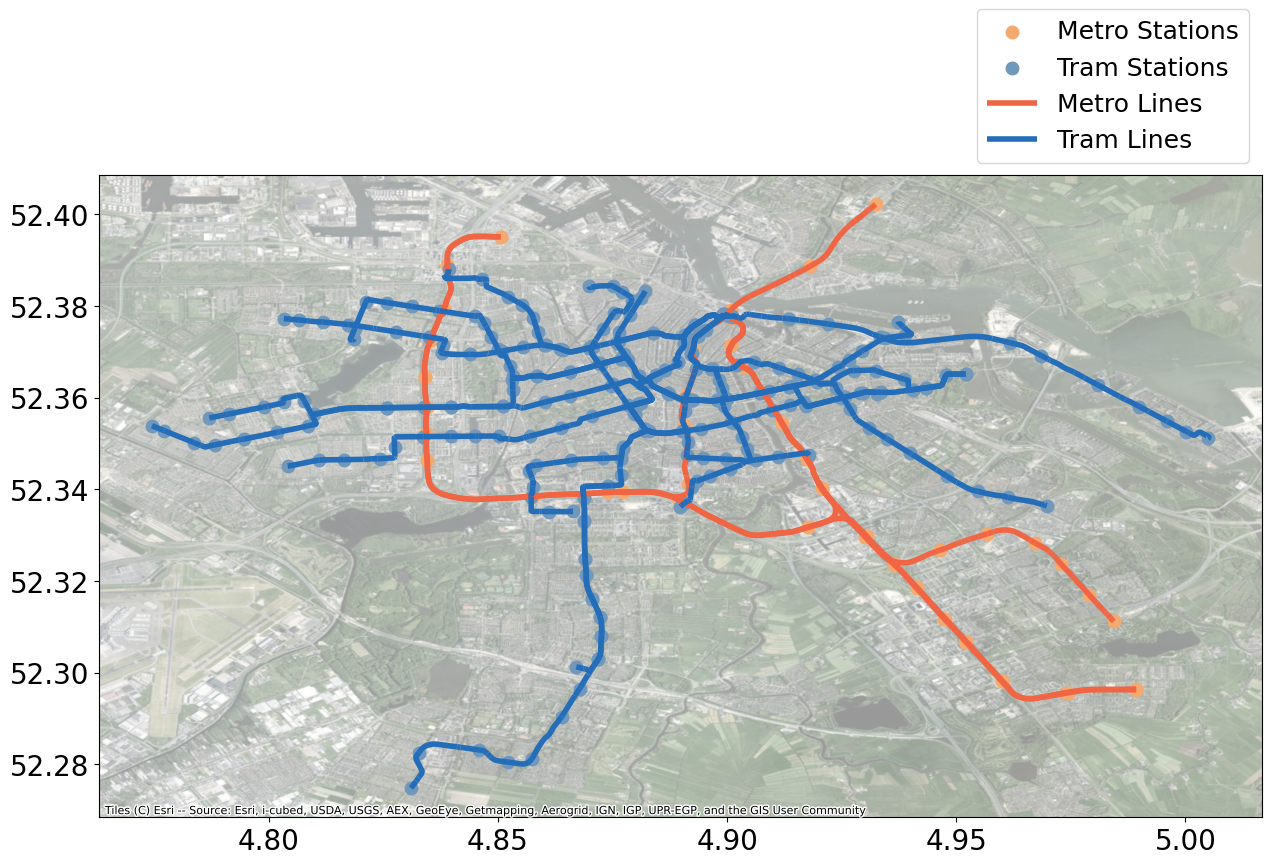

In [142]:
plt.rcParams.update({'font.size': 20})
fig, ax = plt.subplots(figsize = [15,12])

metro_stations_1.plot(ax =ax, color = '#F3AA71', linewidth = 4, label='Metro Stations')
tram_stations_1.plot(ax =ax, color = '#7197BB', linewidth = 4, label='Tram Stations')
metro_lines.plot(ax =ax, color = '#F06543', linewidth = 4, label='Metro Lines')
tram_lines.plot(ax =ax, color = '#246EB9', linewidth = 4, label='Tram Lines')

ctx.add_basemap(ax=ax, crs=metro_lines.crs.to_string(), source=ctx.providers.Esri.WorldImagery, alpha=0.4)

legend = ax.legend(loc='lower right', fontsize=18)
legend.set_bbox_to_anchor((1, 1))  # 设置图例的位置

plt.savefig('baseline.png',dpi=600)

plt.show()

In [141]:
# plt.rcParams.update({'font.size': 25})
# fig, ax = plt.subplots(figsize = [15,12])

# metro_lines.plot(ax =ax, color = '#D24927', linewidth = 4, label='Metro Lines')
# tram_lines.plot(ax =ax, color = '#1060B4', linewidth = 4, label='Tram Lines')

# ctx.add_basemap(ax=ax, crs=metro_lines.crs.to_string(), source=ctx.providers.Esri.WorldImagery, alpha=0.4)

# legend = ax.legend(loc='lower right', fontsize=25)
# legend.set_bbox_to_anchor((1, 1))  # 设置图例的位置

# plt.savefig('baseline.png',dpi=600)

# plt.show()

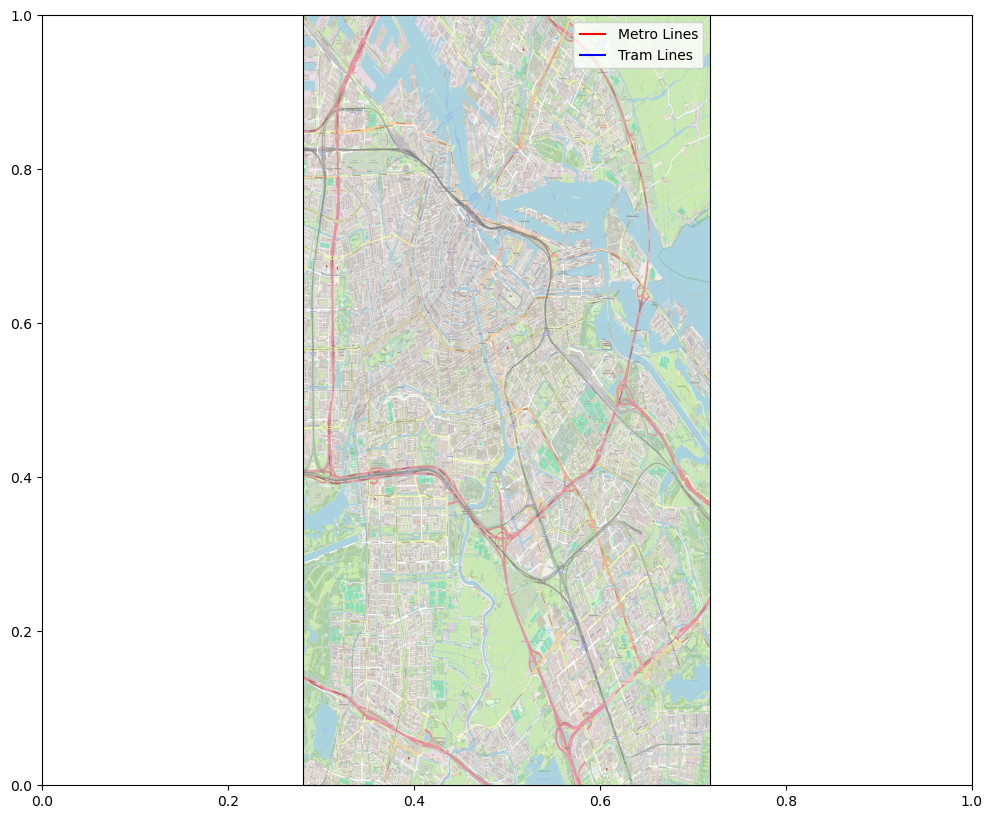

In [150]:
# osm
import matplotlib.pyplot as pl
import numpy as np

import cartopy.crs as ccrs
import cartopy.io.img_tiles as cimgt
fig, ax = plt.subplots(figsize = [12,10])
# ctx.add_basemap(ax=ax, crs=metro_lines.crs.to_string(), source=ctx.providers.Esri.WorldImagery)

request = cimgt.OSM()
extent = [4.83, 5.00, 52.29, 52.41]

ax = pl.axes(projection=request.crs)
ax.set_extent(extent)
ax.add_image(request, 15)    # 5 = zoom level

metro_lines.plot(ax =ax, color = 'red',label='Metro Lines')
tram_lines.plot(ax =ax, color = 'Blue',label='Tram Lines')
ax.legend(loc='upper right', fontsize=10)

plt.show()

In [151]:
# # OSM
# import matplotlib.pyplot as plt
# import geopandas as gpd
# import contextily as ctx

# # 创建图形和轴对象
# fig, ax = plt.subplots(figsize=[12, 10])

# # 绘制地铁线和有轨电车线
# metro_lines.plot(ax=ax, color='red', label='Metro Lines')
# tram_lines.plot(ax=ax, color='blue', label='Tram Lines')

# # 添加图例
# ax.legend(loc='upper right', fontsize=10)

# # 添加 OpenStreetMap 作为背景
# ctx.add_basemap(ax=ax, source=ctx.providers.OpenStreetMap.Mapnik, alpha=0.4)

# # 保存图像
# plt.savefig('baseline_osm.png')

# # 显示图像
# plt.show()

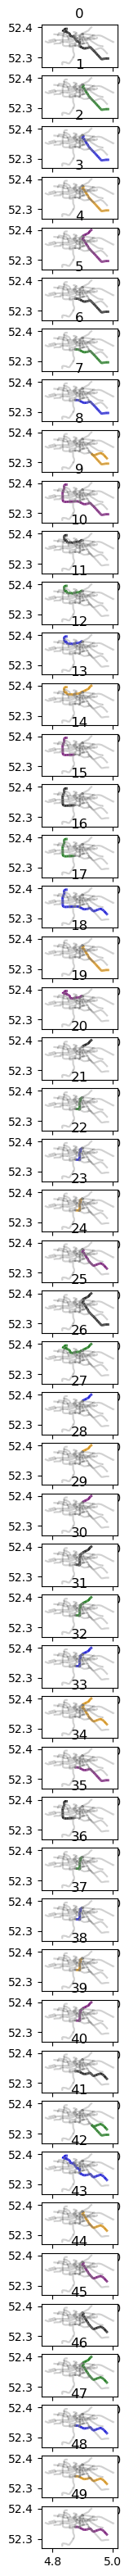

In [147]:
plot_OD_routes(OD_shortest_path_edges,city_two_layer_network_edges)

In [145]:
gpd.GeoDataFrame(city_sub_new_nodes[['geometry','degree','id']]).to_file('city_sub_new_nodes0425.GPKG',driver='GPKG')

In [146]:
gpd.GeoDataFrame(city_sub_connected_edges[['osm_id', 'geometry', 'id', 'from_id', 'to_id', 'distance', 'time', 'weights']]).to_file('city_sub_connected_edges_0425.GPKG',driver='GPKG')

In [147]:
gpd.GeoDataFrame(city_tram_new_nodes[['geometry','degree','id']]).to_file('city_tram_new_nodes_0425.GPKG',driver='GPKG')

In [148]:
gpd.GeoDataFrame(city_tram_connected_edges[['osm_id', 'geometry', 'id', 'from_id', 'to_id', 'distance', 'time', 'weights']]).to_file('city_tram_connected_edges_0425.GPKG',driver='GPKG')

In [149]:
gpd.GeoDataFrame(city_two_layer_network_nodes[['geometry','id']]).to_file('city_two_layer_network_nodes0425.GPKG',driver='GPKG')
gpd.GeoDataFrame(city_two_layer_network_edges[['geometry','id']]).to_file('city_two_layer_network_edges0425.GPKG',driver='GPKG')

In [123]:
# gpd.GeoDataFrame(city_sub_edges[['osm_id', 'geometry', 'id', 'from_id', 'to_id', 'distance', 'time', 'weights']]).to_file('city_sub_edges0422.GPKG',driver='GPKG')
# gpd.GeoDataFrame(city_sub_nodes[['geometry','degree', 'id']]).to_file('city_sub_nodes0422.GPKG',driver='GPKG')
# gpd.GeoDataFrame(city_sub_stations[['osm_id', 'geometry','name']]).to_file('city_sub_stations_0417.GPKG',driver='GPKG')
# gpd.GeoDataFrame(city_sub_routes[['osm_id', 'route', 'name', 'geometry']]).to_file('city_sub_routes_0417.GPKG',driver='GPKG')

In [148]:
df50_1 = city_sub_shortest_path_edges_dict['Metro 50: Gein => Isolatorweg']
df50_2 = city_sub_shortest_path_edges_dict['Metro 50: Isolatorweg => Gein']

df51_1 = city_sub_shortest_path_edges_dict['Metro 51: Centraal Station => Isolatorweg']
df51_2 = city_sub_shortest_path_edges_dict['Metro 51: Isolatorweg => Centraal Station']

df52_1 = city_sub_shortest_path_edges_dict['Metro 52: Noord => Zuid'] 
df52_2 = city_sub_shortest_path_edges_dict['Metro 52: Zuid => Noord']

df53_1 = city_sub_shortest_path_edges_dict['Metro 53: Centraal Station => Gaasperplas']
df53_2 = city_sub_shortest_path_edges_dict['Metro 53: Gaasperplas => Centraal Station']

df54_1 = city_sub_shortest_path_edges_dict['Metro 54: Centraal Station => Gein']
df54_2 = city_sub_shortest_path_edges_dict['Metro 54: Gein => Centraal Station']

In [149]:
gpd.GeoDataFrame(df50_1[['osm_id', 'geometry','id','from_id','to_id','distance','time','weights']]).to_file('df50_1_0426.GPKG',driver='GPKG')
gpd.GeoDataFrame(df50_2[['osm_id', 'geometry','id','from_id','to_id','distance','time','weights']]).to_file('df50_2_0426.GPKG',driver='GPKG')
gpd.GeoDataFrame(df51_1[['osm_id', 'geometry','id','from_id','to_id','distance','time','weights']]).to_file('df51_1_0426.GPKG',driver='GPKG')
gpd.GeoDataFrame(df51_2[['osm_id', 'geometry','id','from_id','to_id','distance','time','weights']]).to_file('df51_2_0426.GPKG',driver='GPKG')
gpd.GeoDataFrame(df52_1[['osm_id', 'geometry','id','from_id','to_id','distance','time','weights']]).to_file('df52_1_0426.GPKG',driver='GPKG')
gpd.GeoDataFrame(df52_2[['osm_id', 'geometry','id','from_id','to_id','distance','time','weights']]).to_file('df52_2_0426.GPKG',driver='GPKG')
gpd.GeoDataFrame(df53_1[['osm_id', 'geometry','id','from_id','to_id','distance','time','weights']]).to_file('df53_1_0426.GPKG',driver='GPKG')
gpd.GeoDataFrame(df53_2[['osm_id', 'geometry','id','from_id','to_id','distance','time','weights']]).to_file('df53_2_0426.GPKG',driver='GPKG')
gpd.GeoDataFrame(df54_1[['osm_id', 'geometry','id','from_id','to_id','distance','time','weights']]).to_file('df54_1_0426.GPKG',driver='GPKG')
gpd.GeoDataFrame(df54_2[['osm_id', 'geometry','id','from_id','to_id','distance','time','weights']]).to_file('df54_2_0417.GPKG',driver='GPKG')

In [150]:
# gpd.GeoDataFrame(city_sub_new_stations[['id','geometry','degree','name','ref','transfer']]).to_file('city_sub_new_stations0425.GPKG',driver='GPKG')

In [151]:
# gpd.GeoDataFrame(city_sub_new_edges[['osm_id', 'geometry', 'id', 'from_id', 'to_id', 'distance', 'time', 'weights']]).to_file('city_sub_new_edges_0425.GPKG',driver='GPKG')

In [152]:
# gpd.GeoDataFrame(city_tram_edges[['osm_id', 'geometry', 'id', 'from_id', 'to_id', 'distance', 'time', 'weights']]).to_file('city_tram_edges_0417.GPKG',driver='GPKG')
# gpd.GeoDataFrame(city_tram_stations[['osm_id', 'geometry','name']]).to_file('city_tram_stations_0417.GPKG',driver='GPKG')
# gpd.GeoDataFrame(city_tram_nodes[['geometry','degree','id']]).to_file('city_tram_nodes_0417.GPKG',driver='GPKG')
# gpd.GeoDataFrame(city_tram_routes[['osm_id', 'route', 'name', 'geometry']]).to_file('city_tram_routes_0417.GPKG',driver='GPKG')

# # city_tram_stations.to_excel('.\city_tram_stations.xlsx',header = True,index = False)

In [155]:
len(city_tram_shortest_path_edges_dict)

28

In [153]:
df1_1 = city_tram_shortest_path_edges_dict['Tram 1: Amsterdam Muiderpoortstation =>Amsterdam Osdorp De Aker']
df1_2 = city_tram_shortest_path_edges_dict['Tram 1: Amsterdam Osdorp de Aker => Amsterdam Muiderpoortstation']

df12_1 = city_tram_shortest_path_edges_dict['Tram 12: Amsterdam Centraal Station => Amsterdam Amstelstation']
df12_2 = city_tram_shortest_path_edges_dict['Tram 12: Amsterdam Amstelstation => Amsterdam Centraal Station']

df13_1 = city_tram_shortest_path_edges_dict['Tram 13: Amsterdam Centraal Station => Amsterdam Geuzenveld']
df13_2 = city_tram_shortest_path_edges_dict['Tram 13: Amsterdam Geuzenveld => Amsterdam Centraal Station']

df14_1 = city_tram_shortest_path_edges_dict['Tram 14: Amsterdam Centraal Station => Amsterdam Flevopark']
df14_2 = city_tram_shortest_path_edges_dict['Tram 14: Amsterdam Flevopark => Amsterdam Centraal Station']

df17_1 = city_tram_shortest_path_edges_dict['Tram 17: Amsterdam Centraal Station => Amsterdam Osdorp Dijkgraafsplein']
df17_2 = city_tram_shortest_path_edges_dict['Tram 17: Amsterdam Osdorp Dijkgraafsplein => Amsterdam Centraal Station']

df19_1 = city_tram_shortest_path_edges_dict['Tram 19: Amsterdam Sloterdijk => Diemen Sniep']
df19_2 = city_tram_shortest_path_edges_dict['Tram 19: Diemen Sniep => Amsterdam Sloterdijk']

df2_1 = city_tram_shortest_path_edges_dict['Tram 2: Amsterdam Centraal Station => Amsterdam Nieuw Sloten']
df2_2 = city_tram_shortest_path_edges_dict['Tram 2: Amsterdam Nieuw Sloten => Amsterdam Centraal Station']

df24_1 = city_tram_shortest_path_edges_dict['Tram 24: Amsterdam Centraal Station => Amsterdam VUmc']
df24_2 = city_tram_shortest_path_edges_dict['Tram 24: Amsterdam VUmc => Amsterdam Centraal Station']

df25_1 = city_tram_shortest_path_edges_dict['Tram 25: Amstelveen Westwijk => Amsterdam Station Zuid']
df25_2 = city_tram_shortest_path_edges_dict['Tram 25: Amsterdam Station Zuid => Amstelveen Westwijk']

df26_1 = city_tram_shortest_path_edges_dict['Tram 26: Amsterdam IJburg => Amsterdam Centraal Station']
df26_2 = city_tram_shortest_path_edges_dict['Tram 26: Amsterdam Centraal Station => Amsterdam IJburg']

df3_1 = city_tram_shortest_path_edges_dict['Tram 3: Amsterdam Westergasfabriek => Amsterdam Flevopark']
df3_2 = city_tram_shortest_path_edges_dict['Tram 3: Amsterdam Flevopark => Amsterdam Westergasfabriek']

df4_1 = city_tram_shortest_path_edges_dict['Tram 4: Amsterdam Station RAI => Amsterdam Centraal Station']
df4_2 = city_tram_shortest_path_edges_dict['Tram 4: Amsterdam Centraal Station => Amsterdam Station RAI']

df5_1 = city_tram_shortest_path_edges_dict['Tram 5: Amstelveen Stadshart => Amsterdam Eerste Marnixdwarsstraat']
df5_2 = city_tram_shortest_path_edges_dict['Tram 5: Amsterdam Eerste Marnixdwarsstraat => Amstelveen Stadshart']

df7_1 = city_tram_shortest_path_edges_dict['Tram 7: Amsterdam Azartplein => Amsterdam Slotermeer']
df7_2 = city_tram_shortest_path_edges_dict['Tram 7: Amsterdam Slotermeer => Amsterdam Azartplein']

In [154]:
gpd.GeoDataFrame(df1_1[['osm_id', 'geometry','id','from_id','to_id','distance','time','weights']]).to_file('df1_1_0426.GPKG',driver='GPKG')
gpd.GeoDataFrame(df1_2[['osm_id', 'geometry','id','from_id','to_id','distance','time','weights']]).to_file('df1_2_0426.GPKG',driver='GPKG')
gpd.GeoDataFrame(df12_1[['osm_id', 'geometry','id','from_id','to_id','distance','time','weights']]).to_file('df12_1_0426.GPKG',driver='GPKG')
gpd.GeoDataFrame(df12_2[['osm_id', 'geometry','id','from_id','to_id','distance','time','weights']]).to_file('df12_2_0426.GPKG',driver='GPKG')
gpd.GeoDataFrame(df13_1[['osm_id', 'geometry','id','from_id','to_id','distance','time','weights']]).to_file('df13_1_0426.GPKG',driver='GPKG')
gpd.GeoDataFrame(df13_2[['osm_id', 'geometry','id','from_id','to_id','distance','time','weights']]).to_file('df13_2_0426.GPKG',driver='GPKG')
gpd.GeoDataFrame(df14_1[['osm_id', 'geometry','id','from_id','to_id','distance','time','weights']]).to_file('df14_1_0426.GPKG',driver='GPKG')
gpd.GeoDataFrame(df14_2[['osm_id', 'geometry','id','from_id','to_id','distance','time','weights']]).to_file('df14_2_0426.GPKG',driver='GPKG')
gpd.GeoDataFrame(df17_1[['osm_id', 'geometry','id','from_id','to_id','distance','time','weights']]).to_file('df17_1_0426.GPKG',driver='GPKG')
gpd.GeoDataFrame(df17_2[['osm_id', 'geometry','id','from_id','to_id','distance','time','weights']]).to_file('df17_2_0426.GPKG',driver='GPKG')
gpd.GeoDataFrame(df19_1[['osm_id', 'geometry','id','from_id','to_id','distance','time','weights']]).to_file('df19_1_0426.GPKG',driver='GPKG')
gpd.GeoDataFrame(df19_2[['osm_id', 'geometry','id','from_id','to_id','distance','time','weights']]).to_file('df19_2_0426.GPKG',driver='GPKG')
gpd.GeoDataFrame(df2_1[['osm_id', 'geometry','id','from_id','to_id','distance','time','weights']]).to_file('df2_1_0426.GPKG',driver='GPKG')
gpd.GeoDataFrame(df2_2[['osm_id', 'geometry','id','from_id','to_id','distance','time','weights']]).to_file('df2_2_0426.GPKG',driver='GPKG')
gpd.GeoDataFrame(df24_1[['osm_id', 'geometry','id','from_id','to_id','distance','time','weights']]).to_file('df24_1_0426.GPKG',driver='GPKG')
gpd.GeoDataFrame(df24_2[['osm_id', 'geometry','id','from_id','to_id','distance','time','weights']]).to_file('df24_2_0426.GPKG',driver='GPKG')
gpd.GeoDataFrame(df25_1[['osm_id', 'geometry','id','from_id','to_id','distance','time','weights']]).to_file('df25_1_0426.GPKG',driver='GPKG')
gpd.GeoDataFrame(df25_2[['osm_id', 'geometry','id','from_id','to_id','distance','time','weights']]).to_file('df25_2_0426.GPKG',driver='GPKG')
gpd.GeoDataFrame(df26_1[['osm_id', 'geometry','id','from_id','to_id','distance','time','weights']]).to_file('df26_1_0426.GPKG',driver='GPKG')
gpd.GeoDataFrame(df26_2[['osm_id', 'geometry','id','from_id','to_id','distance','time','weights']]).to_file('df26_2_0426.GPKG',driver='GPKG')
gpd.GeoDataFrame(df3_1[['osm_id', 'geometry','id','from_id','to_id','distance','time','weights']]).to_file('df3_1_0426.GPKG',driver='GPKG')
gpd.GeoDataFrame(df3_2[['osm_id', 'geometry','id','from_id','to_id','distance','time','weights']]).to_file('df3_2_0426.GPKG',driver='GPKG')
gpd.GeoDataFrame(df4_1[['osm_id', 'geometry','id','from_id','to_id','distance','time','weights']]).to_file('df4_1_0426.GPKG',driver='GPKG')
gpd.GeoDataFrame(df4_2[['osm_id', 'geometry','id','from_id','to_id','distance','time','weights']]).to_file('df4_2_0426.GPKG',driver='GPKG')
gpd.GeoDataFrame(df5_1[['osm_id', 'geometry','id','from_id','to_id','distance','time','weights']]).to_file('df5_1_0426.GPKG',driver='GPKG')
gpd.GeoDataFrame(df5_2[['osm_id', 'geometry','id','from_id','to_id','distance','time','weights']]).to_file('df5_2_0426.GPKG',driver='GPKG')
gpd.GeoDataFrame(df7_1[['osm_id', 'geometry','id','from_id','to_id','distance','time','weights']]).to_file('df7_1_0426.GPKG',driver='GPKG')
gpd.GeoDataFrame(df7_2[['osm_id', 'geometry','id','from_id','to_id','distance','time','weights']]).to_file('df7_2_0426.GPKG',driver='GPKG')

In [133]:
# gpd.GeoDataFrame(city_tram_new_edges[['osm_id', 'geometry', 'id', 'from_id', 'to_id', 'distance', 'time', 'weights']]).to_file('city_tram_new_edges_0418.GPKG',driver='GPKG')

In [135]:
# gpd.GeoDataFrame(city_tram_new_stations[['geometry','degree','id']]).to_file('city_tram_new_stations_0425.GPKG',driver='GPKG')

In [137]:
# gpd.GeoDataFrame(connect_edges_sub_to_tram[['geometry','from_id','to_id']]).to_file('connect_edges_sub_to_tram_0417.GPKG',driver='GPKG')